# importstatements

In [545]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,make_scorer,roc_curve,roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings("ignore")

In [546]:
df=pd.read_csv('E:\machine_pro\lung_cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [547]:
d=df['LUNG_CANCER'].value_counts()
e=df['GENDER'].value_counts()
print(d)
print(e)

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64
GENDER
M    162
F    147
Name: count, dtype: int64


In [548]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES
305,M,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
306,M,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES
307,M,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES


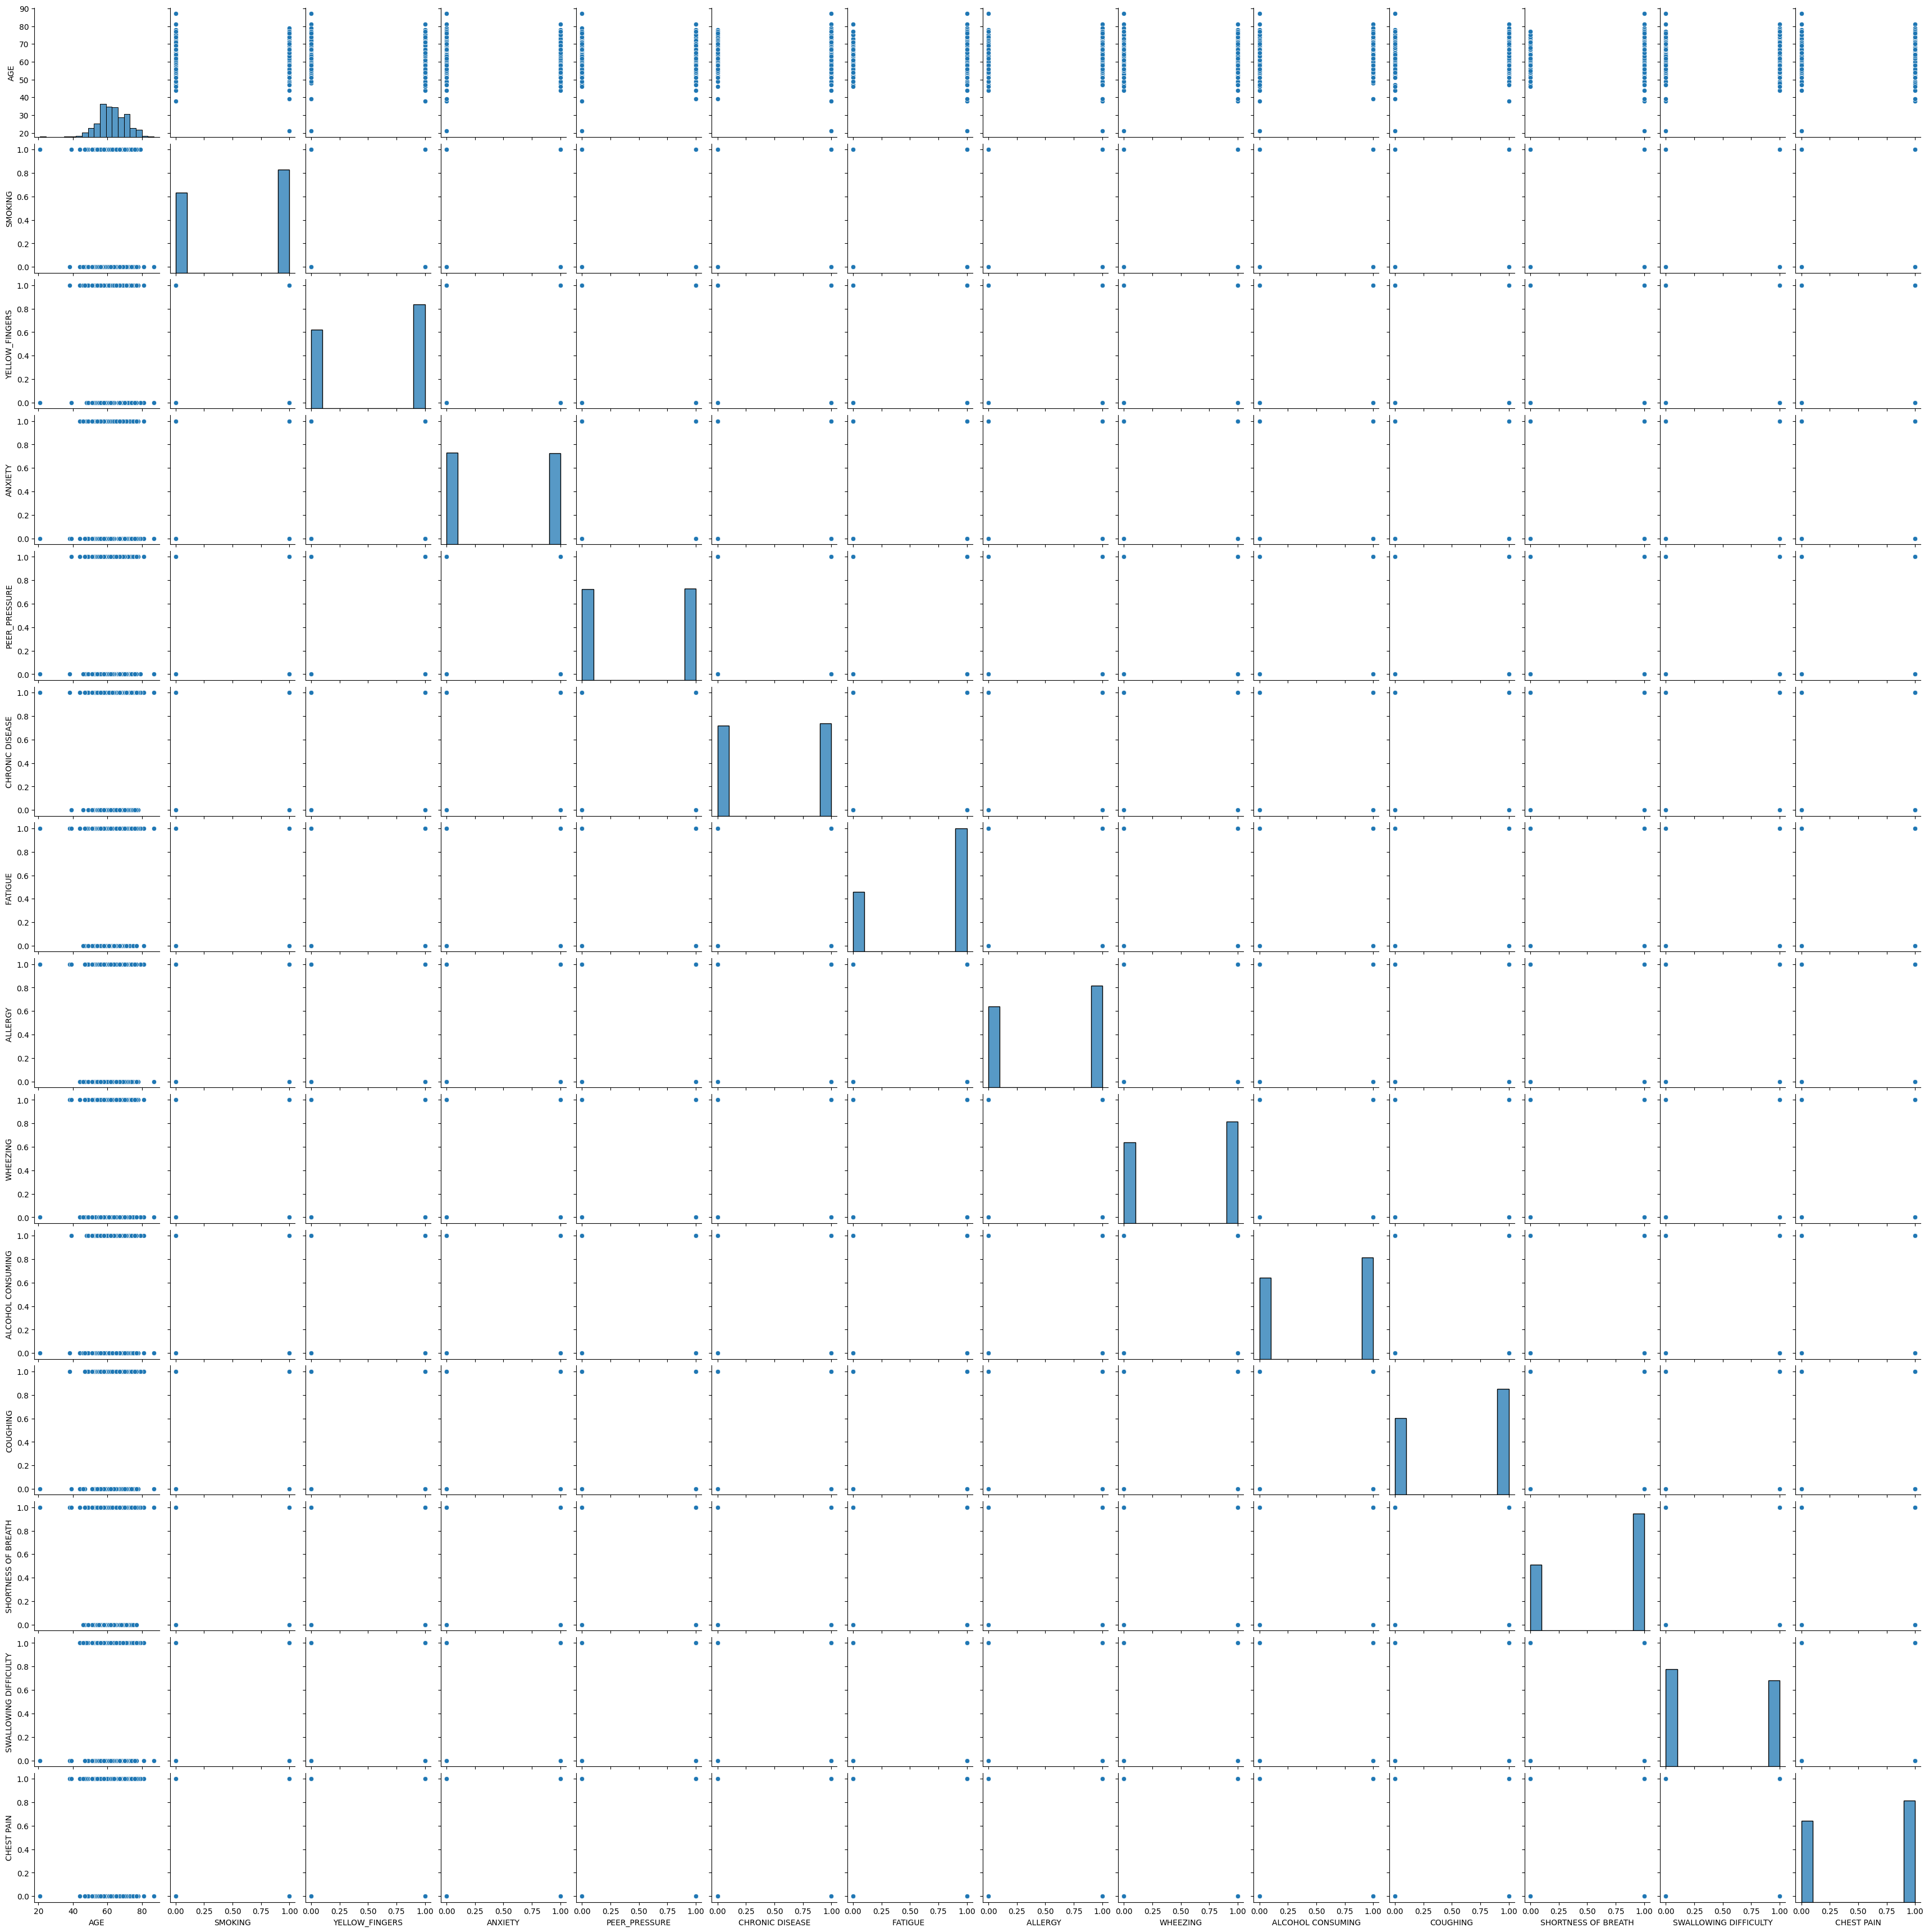

In [549]:
sns.pairplot(data=df)

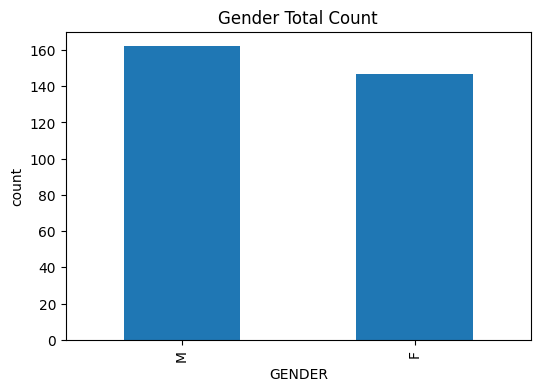

In [550]:
plt.figure(figsize=(6,4))
plt.title("Gender Total Count")
plt.xlabel("Gender")
plt.ylabel("count")
df["GENDER"].value_counts().plot(kind= 'bar')
plt.show()

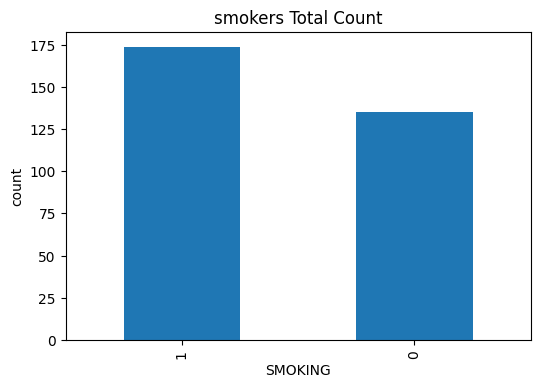

In [551]:
plt.figure(figsize=(6,4))
plt.title("smokers Total Count")
plt.xlabel("smokers")
plt.ylabel("count")
df["SMOKING"].value_counts().plot(kind= 'bar')
plt.show()

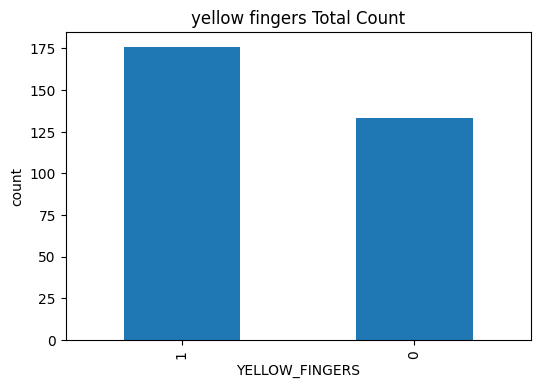

In [552]:
plt.figure(figsize=(6,4))
plt.title("yellow fingers Total Count")
plt.xlabel("yellow fingers")
plt.ylabel("count")
df["YELLOW_FINGERS"].value_counts().plot(kind= 'bar')
plt.show()

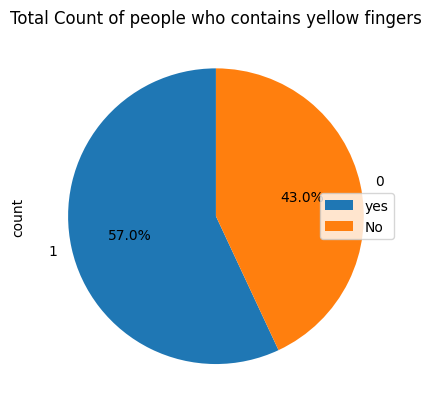

In [553]:
plt.figure()
labels="yes","No"
plt.title("Total Count of people who contains yellow fingers")
df["YELLOW_FINGERS"].value_counts().plot(kind= 'pie',autopct='%1.1f%%',startangle=90)
plt.legend( loc = 'right', labels=labels)
plt.show()

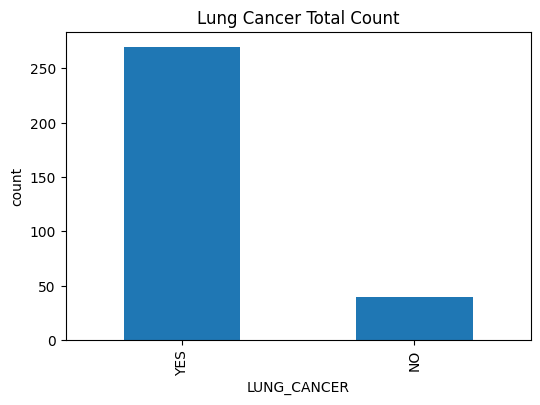

In [554]:

plt.figure(figsize=(6,4))
plt.title("Lung Cancer Total Count")
plt.xlabel("lung cancer")
plt.ylabel("count")
df["LUNG_CANCER"].value_counts().plot(kind= 'bar')
plt.show()

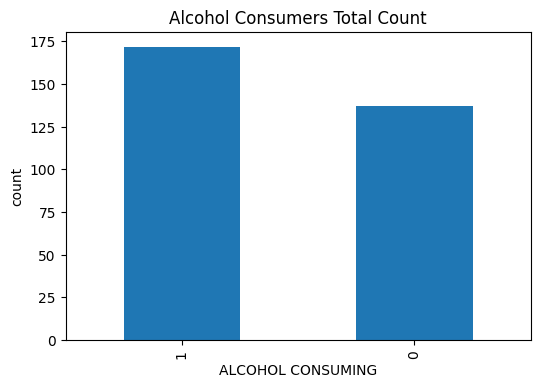

In [555]:
plt.figure(figsize=(6,4))
plt.title("Alcohol Consumers Total Count")
plt.xlabel("Alcohol Consumers ")
plt.ylabel("count")
df["ALCOHOL CONSUMING"].value_counts().plot(kind= 'bar')
plt.show()

In [556]:
def plotting(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts().unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='GENDER'>

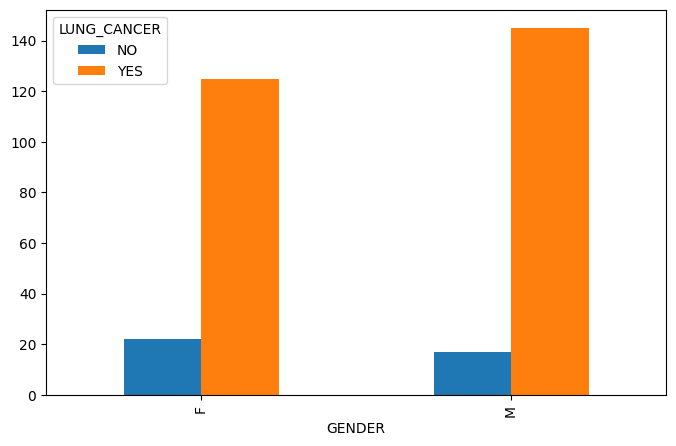

In [557]:
plotting("GENDER")

<Axes: xlabel='SMOKING'>

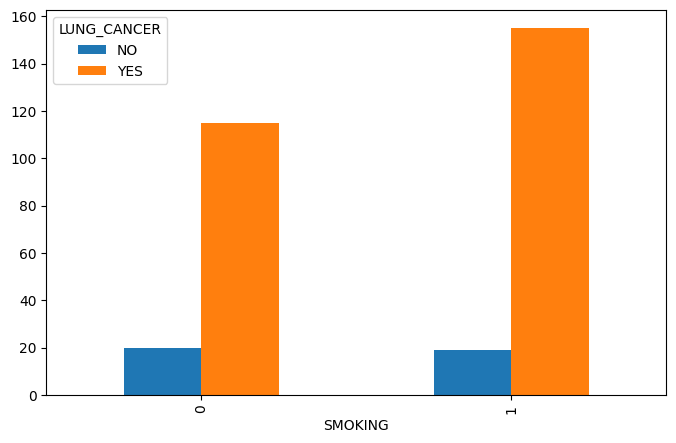

In [558]:
plotting('SMOKING')

<Axes: xlabel='YELLOW_FINGERS'>

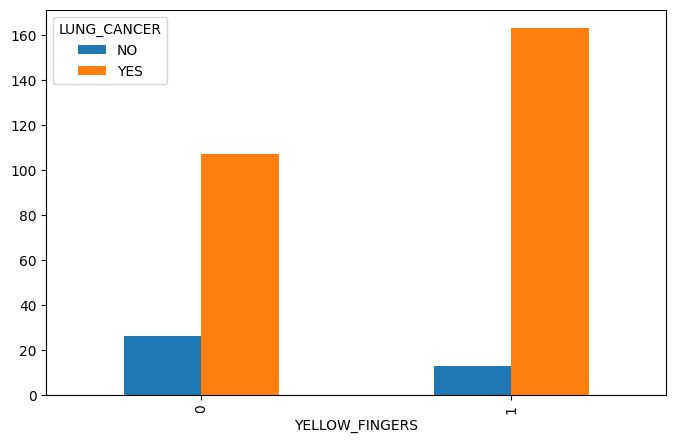

In [559]:
plotting('YELLOW_FINGERS')

<Axes: xlabel='ANXIETY'>

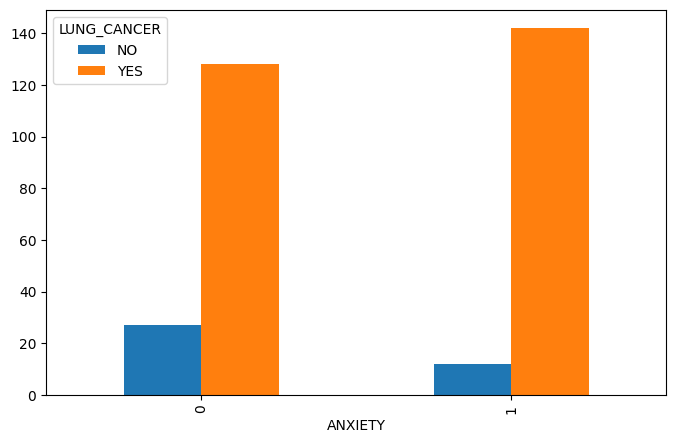

In [560]:
plotting("ANXIETY")

<Axes: xlabel='PEER_PRESSURE'>

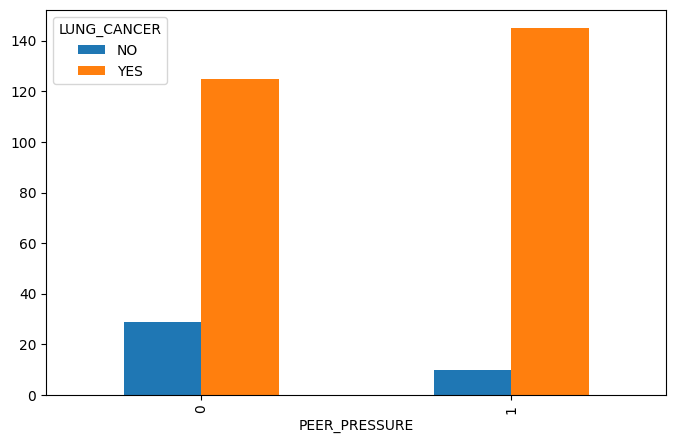

In [561]:
plotting("PEER_PRESSURE")

<Axes: xlabel='CHRONIC DISEASE'>

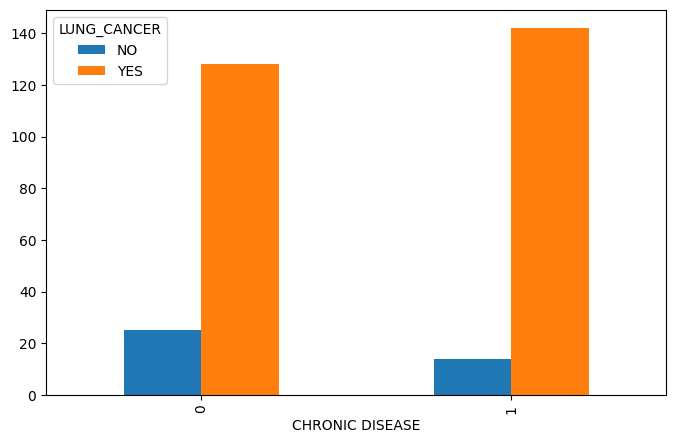

In [562]:
plotting('CHRONIC DISEASE')

<Axes: xlabel='FATIGUE '>

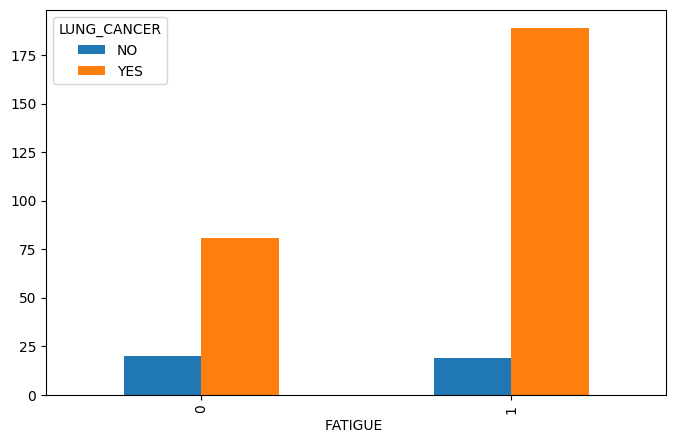

In [563]:
plotting('FATIGUE ')

<Axes: xlabel='ALLERGY '>

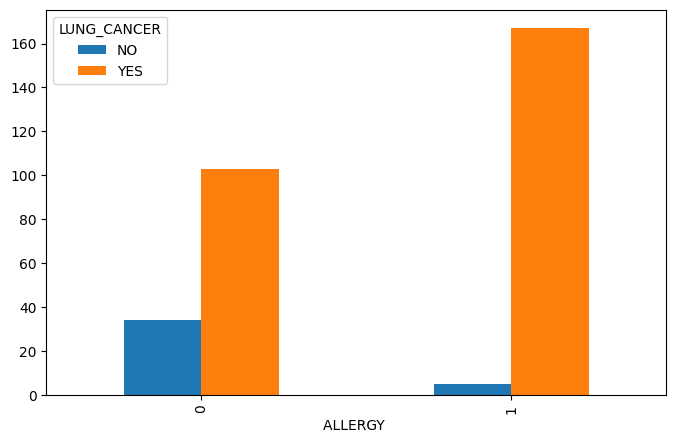

In [564]:
plotting('ALLERGY ')

<Axes: xlabel='WHEEZING'>

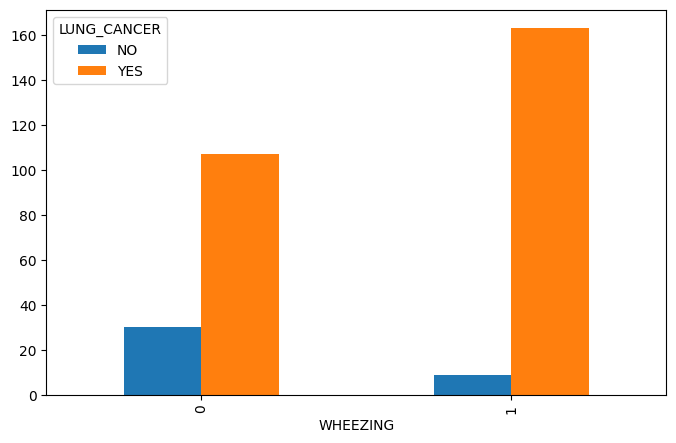

In [565]:
plotting("WHEEZING")

<Axes: xlabel='ALCOHOL CONSUMING'>

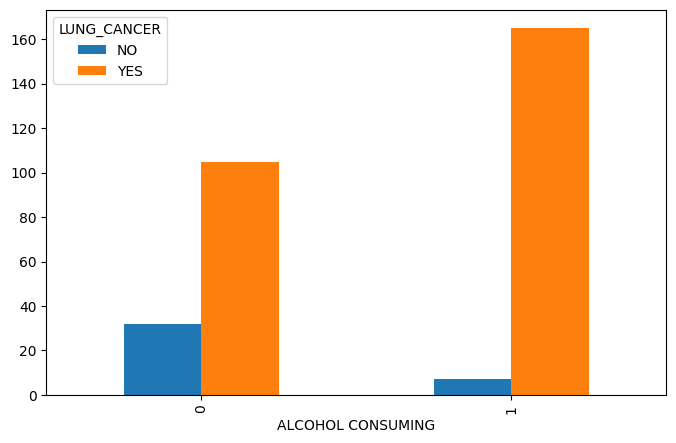

In [566]:
plotting("ALCOHOL CONSUMING")

<Axes: xlabel='COUGHING'>

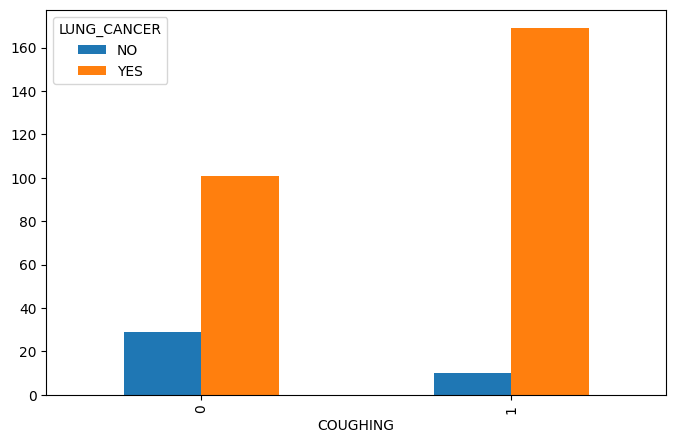

In [567]:
plotting("COUGHING")

<Axes: xlabel='SHORTNESS OF BREATH'>

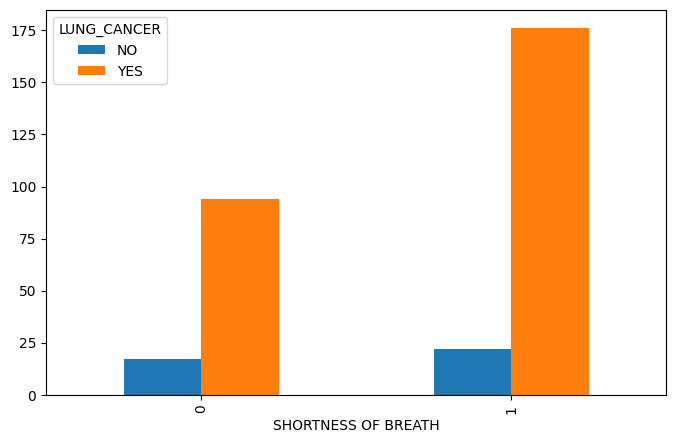

In [568]:
plotting("SHORTNESS OF BREATH")

<Axes: xlabel='SWALLOWING DIFFICULTY'>

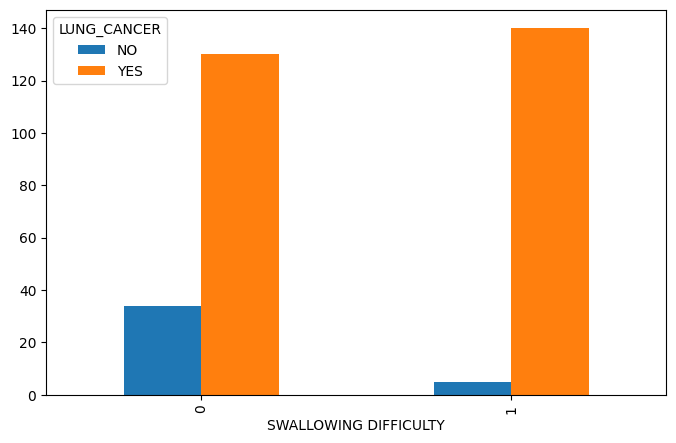

In [569]:
plotting("SWALLOWING DIFFICULTY")

<Axes: xlabel='CHEST PAIN'>

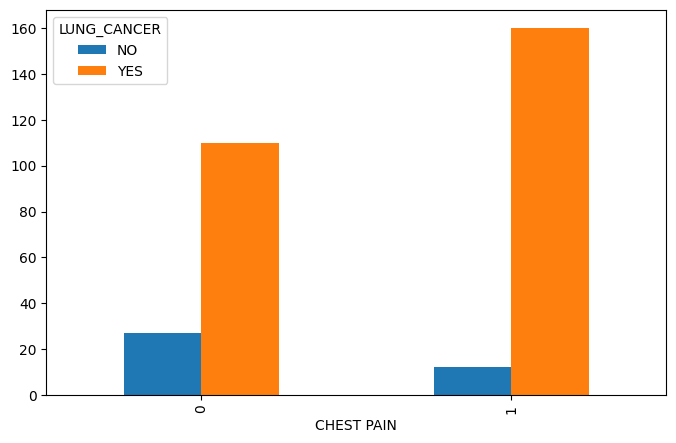

In [570]:
plotting("CHEST PAIN")

In [571]:
df['GENDER']=df['GENDER'].apply({'M':0,'F':1}.get)

In [572]:
df['LUNG_CANCER']=df['LUNG_CANCER'].apply({'NO':0,'YES':1}.get)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,0,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,0,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,0,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [574]:
df.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [575]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.475728,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [576]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<Axes: >

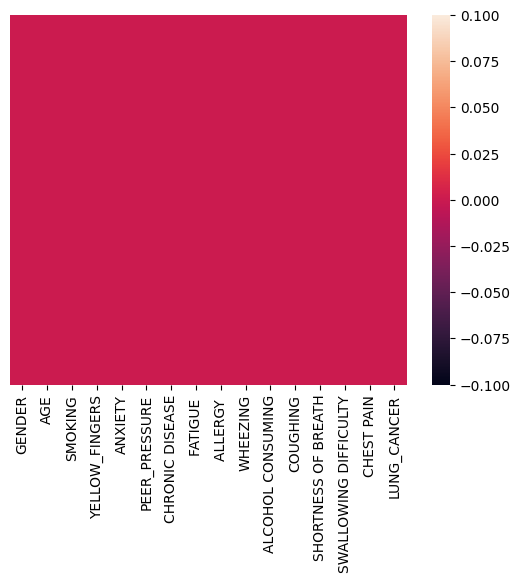

In [577]:

sns.heatmap(df.isnull(),yticklabels = False)


In [578]:
correlation = df.corr()
correlation

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,-0.021306,-0.036277,0.212959,0.152127,0.275564,0.204606,0.083560,-0.154251,-0.141207,-0.454268,-0.133303,0.064911,0.078161,-0.362958,-0.067254
AGE,-0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,-0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,-0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,-0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


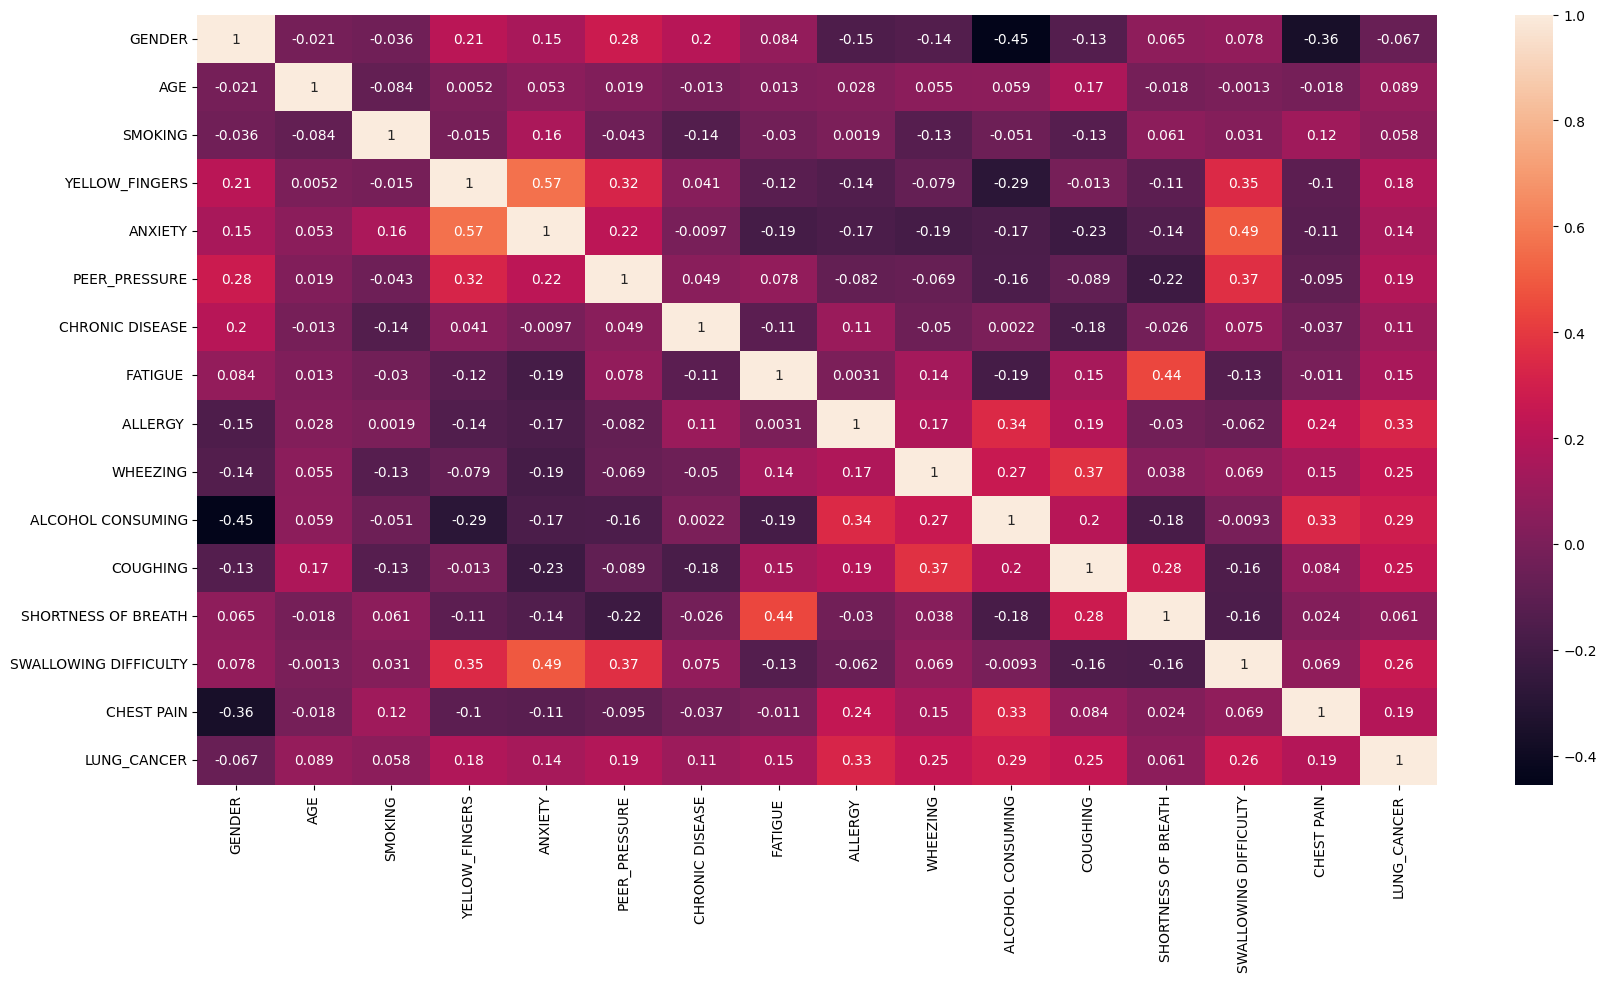

In [579]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True);

In [580]:
df.pop('YELLOW_FINGERS')
df

,GENDER,AGE,SMOKING,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,0,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,0,0,1,1,1,0,0,1,1,1,1,0,1
305,0,70,1,0,0,0,1,1,1,1,1,1,0,1,1
306,0,58,1,0,0,0,0,1,1,1,1,0,0,1,1
307,0,67,1,1,0,0,1,1,0,1,1,1,0,1,1


detection of outliers

<Axes: ylabel='AGE'>

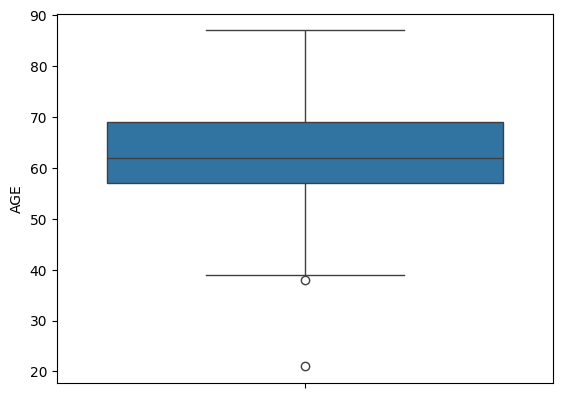

In [581]:
sns.boxplot(df['AGE'])

In [582]:
upper_limit = df['AGE'].quantile(0.75)
lower_limit = df['AGE'].quantile(0.25)
print(upper_limit)
print(lower_limit )

69.0
57.0


In [583]:
dfs = df[(df['AGE'] <= 69.0) & (df['AGE'] >= 57.0)]

<Axes: ylabel='AGE'>

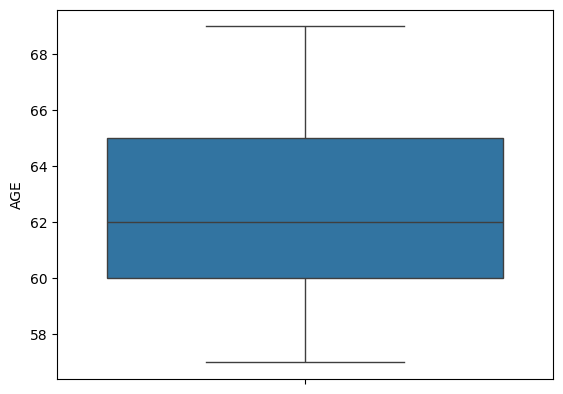

In [584]:
sns.boxplot(dfs['AGE'])

In [585]:
x=df.drop(columns='LUNG_CANCER')
print(x)
y=df['LUNG_CANCER']
print(y)

     GENDER  AGE  SMOKING  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   \
0         0   69        0        1              0                0         1   
1         0   74        1        0              0                1         1   
2         1   59        0        0              1                0         1   
3         0   63        1        1              0                0         0   
4         1   63        0        0              0                0         0   
..      ...  ...      ...      ...            ...              ...       ...   
304       1   56        0        0              1                1         1   
305       0   70        1        0              0                0         1   
306       0   58        1        0              0                0         0   
307       0   67        1        1              0                0         1   
308       0   62        0        0              1                0         1   

     ALLERGY   WHEEZING  ALCOHOL CONSUM

Train Test Split

In [586]:

from imblearn.over_sampling import SMOTE

In [587]:
sm = SMOTE(random_state=42, k_neighbors=5)
x, y = sm.fit_resample(x, y)
a=y.value_counts()
a

LUNG_CANCER
1    270
0    270
Name: count, dtype: int64

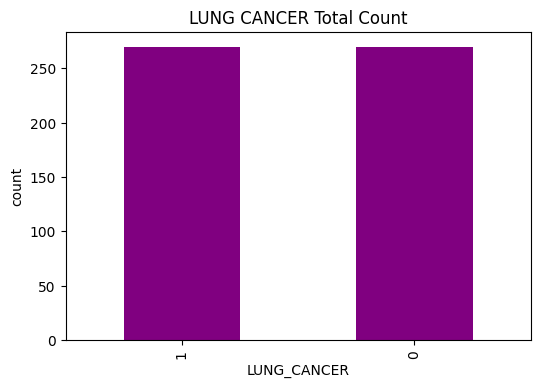

In [588]:
plt.figure(figsize=(6,4))
plt.title("LUNG CANCER Total Count")
plt.xlabel("LUNG_CANCER ")
plt.ylabel("count")
y.value_counts().plot(kind= 'bar', color='purple')
plt.show()

In [589]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =42)
print(x.shape,X_train.shape,X_test.shape,y.shape)

(540, 14) (432, 14) (108, 14) (540,)


In [590]:
print(X_train)

     GENDER  AGE  SMOKING  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   \
182       0   71        0        0              0                1         1   
244       1   64        1        1              0                0         1   
539       0   59        0        0              0                0         1   
390       1   68        1        0              0                0         1   
453       1   69        1        0              0                0         1   
..      ...  ...      ...      ...            ...              ...       ...   
71        1   66        1        1              1                0         1   
106       1   61        1        1              1                1         1   
270       1   70        1        0              0                0         1   
435       0   21        1        0              0                1         0   
102       0   64        1        0              0                0         1   

     ALLERGY   WHEEZING  ALCOHOL CONSUM

In [591]:
y_train

182    1
244    1
539    0
390    0
453    0
      ..
71     1
106    1
270    0
435    0
102    1
Name: LUNG_CANCER, Length: 432, dtype: int64

In [592]:
X_test

,GENDER,AGE,SMOKING,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
229,0,57,0,0,0,1,0,1,0,1,1,1,1,1
73,1,60,1,0,0,1,1,0,0,0,0,1,0,0
521,0,46,0,1,0,0,0,0,0,0,0,0,0,0
86,0,66,0,1,0,1,0,1,0,1,1,1,0,1
469,1,63,0,0,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,0,59,0,1,0,0,0,0,0,0,0,0,0,0
148,0,70,1,0,0,0,1,1,1,1,1,1,0,1
46,0,62,1,0,0,1,0,1,0,0,1,1,1,1
93,1,59,0,1,1,1,0,1,1,1,1,1,1,0


In [593]:
y_test

229    1
73     1
521    0
86     1
469    0
      ..
498    0
148    1
46     1
93     1
406    0
Name: LUNG_CANCER, Length: 108, dtype: int64

LOGISTIC REGRESSION

In [594]:

classifier= LogisticRegression(random_state=49)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=49)

In [595]:
y_pred= classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [596]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_pred,y_test)
print(cm)
accuracy1 = accuracy_score(y_test, y_pred)*100
print("Accuracy   :", accuracy1)
precision1= precision_score(y_test, y_pred)*100
print("Precision :", precision1)
recall1= recall_score(y_test, y_pred)*100
print("Recall    :", recall1)
F1_score1 = f1_score(y_test, y_pred)*100
print("F1-score  :", F1_score1)

[[47  1]
 [ 4 56]]
Accuracy   : 95.37037037037037
Precision : 93.33333333333333
Recall    : 98.24561403508771
F1-score  : 95.72649572649571


In [597]:
clf=classification_report(y_pred,y_test,output_dict=True)
a=pd.DataFrame(clf).transpose()
a

,precision,recall,f1-score,support
0,0.921569,0.979167,0.949495,48.000000
1,0.982456,0.933333,0.957265,60.000000
accuracy,0.953704,0.953704,0.953704,0.953704
macro avg,0.952012,0.956250,0.953380,108.000000
weighted avg,0.955395,0.953704,0.953812,108.000000


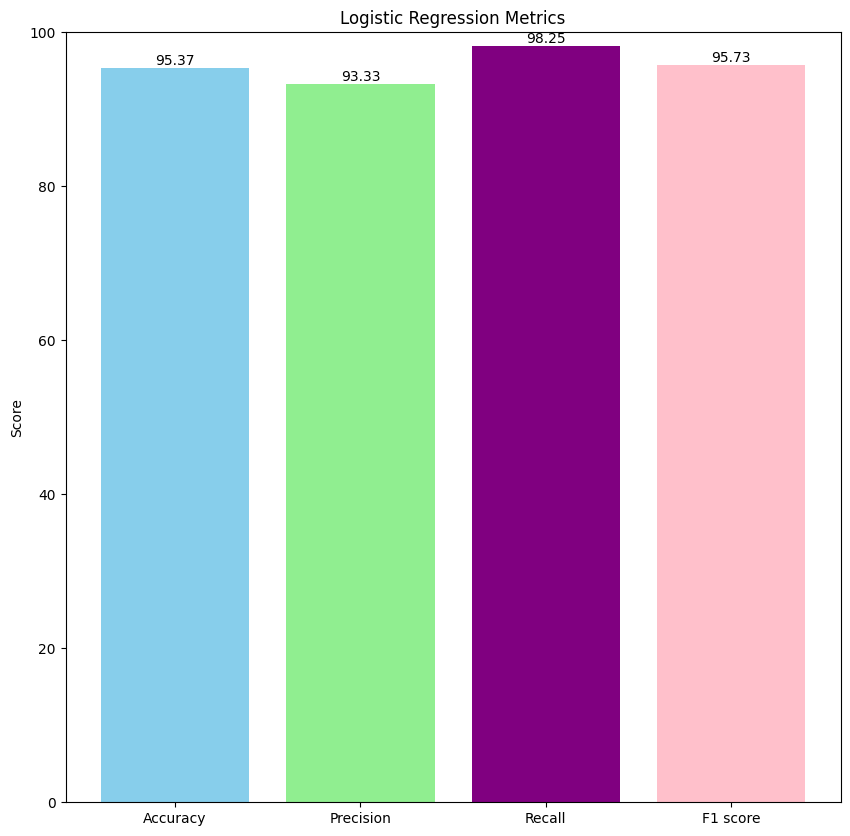

In [598]:
model_name = 'Logistic Regression'
fig, ax = plt.subplots(figsize=(10, 10))
metrics = ['Accuracy', 'Precision', 'Recall','F1 score']
values = [accuracy1,precision1,recall1,F1_score1]
bars = ax.bar(metrics, values, color=['skyblue', 'lightgreen', 'purple','pink'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.title(f'{model_name} Metrics')
plt.ylabel('Score')
plt.ylim(0, 100)
plt.show()

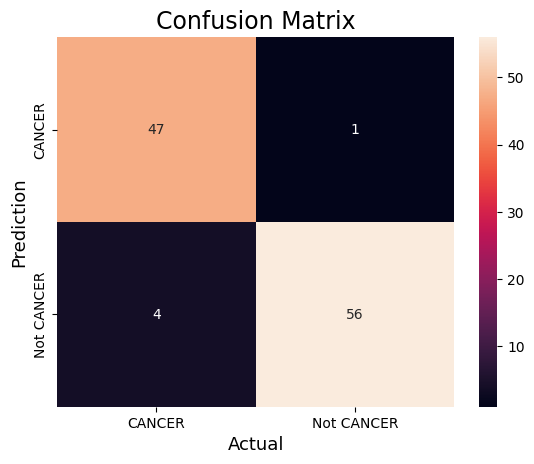

In [599]:
sns.heatmap(cm,
            annot=True,
            xticklabels=['CANCER','Not CANCER'],
            yticklabels=['CANCER','Not CANCER'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [600]:
# cross validation
k =25
kf = StratifiedKFold(n_splits=k)
kf1=cross_val_predict(classifier,x,y,cv=kf)
mod = cross_val_score(classifier,x, y, scoring='accuracy', cv=kf)
lr_ac=np.mean(mod)*100
print("accuracy:",np.mean(mod)*100)
p= cross_val_score(classifier,x, y, scoring='precision',cv=kf)
lr_pc=np.mean(p)*100
print("precision:",np.mean(p)*100)
f1 = cross_val_score(classifier,x, y, scoring='f1',cv=kf)
lr_f1=np.mean(f1)*100
print("f1_score:",np.mean(f1)*100)
re= cross_val_score(classifier,x, y, scoring='recall',cv=kf)
lr_re=np.mean(re)*100
print("Recall:",np.mean(re)*100)

accuracy: 96.14718614718615
precision: 97.33109243697479
f1_score: 96.29794486215539
Recall: 96.0


In [601]:
clf1=classification_report(y,kf1,output_dict=True)
b=pd.DataFrame(clf1).transpose()
b

,precision,recall,f1-score,support
0,0.959410,0.962963,0.961183,270.000000
1,0.962825,0.959259,0.961039,270.000000
accuracy,0.961111,0.961111,0.961111,0.961111
macro avg,0.961117,0.961111,0.961111,540.000000
weighted avg,0.961117,0.961111,0.961111,540.000000


In [602]:
sensitivity_scorer = make_scorer(lambda y, y_pred: confusion_matrix(y, y_pred)[1, 1] / (confusion_matrix(y, y_pred)[1, 1] + confusion_matrix(y, y_pred)[1, 0]))
sens=cross_val_score(classifier,x,y,scoring=sensitivity_scorer,cv=kf)
lr_sen=np.mean(sens)*100
print("sensitivity:",np.mean(sens)*100)
specificity_scorer = make_scorer(lambda y, y_pred: confusion_matrix(y, y_pred)[0, 0] / (confusion_matrix(y, y_pred)[0, 0] + confusion_matrix(y, y_pred)[0, 1]))
spec = cross_val_score(classifier, x, y, scoring=specificity_scorer, cv=kf)
lr_spe=np.mean(spec)*100
print("Specificity:",np.mean(spec)*100)

sensitivity: 96.0
Specificity: 96.36363636363637


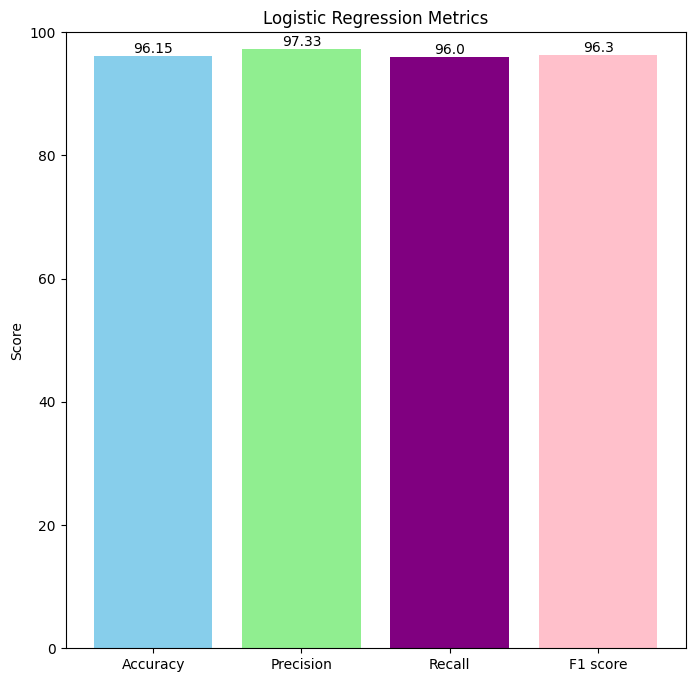

In [603]:
model_name = 'Logistic Regression'
fig, ax = plt.subplots(figsize=(8, 8))
metrics = ['Accuracy', 'Precision', 'Recall','F1 score']
values = [lr_ac,lr_pc,lr_re,lr_f1]
bars = ax.bar(metrics, values, color=['skyblue', 'lightgreen', 'purple','pink'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.title(f'{model_name} Metrics')
plt.ylabel('Score')
plt.ylim(0, 100)
plt.show()

DECISION TREE

In [604]:
tree = DecisionTreeClassifier( criterion="gini",random_state= 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [605]:
y_pred= tree.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [606]:
cms= confusion_matrix(y_test,y_pred)
print(cms)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

[[47  4]
 [ 2 55]]
94.44444444444444


In [607]:
clf2=classification_report(y_pred,y_test,output_dict=True)
c=pd.DataFrame(clf2).transpose()
c

,precision,recall,f1-score,support
0,0.921569,0.959184,0.940000,49.000000
1,0.964912,0.932203,0.948276,59.000000
accuracy,0.944444,0.944444,0.944444,0.944444
macro avg,0.943240,0.945694,0.944138,108.000000
weighted avg,0.945247,0.944444,0.944521,108.000000


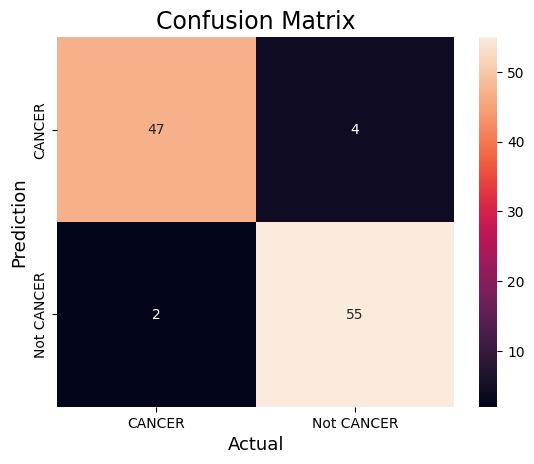

In [608]:
sns.heatmap(cms,
            annot=True,
            xticklabels=['CANCER','Not CANCER'],
            yticklabels=['CANCER','Not CANCER'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [609]:
accuracy2 = accuracy_score(y_test, y_pred)*100
print("Accuracy   :", accuracy2)
precision2 = precision_score(y_test, y_pred)*100
print("Precision :", precision2)
recall2 = recall_score(y_test, y_pred)*100
print("Recall    :", recall2)
F1_score2 = f1_score(y_test, y_pred)*100
print("F1-score  :", F1_score2)

Accuracy   : 94.44444444444444
Precision : 93.22033898305084
Recall    : 96.49122807017544
F1-score  : 94.82758620689654


In [610]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, StratifiedKFold
k =40
kf = StratifiedKFold(k)
kf2=cross_val_predict(tree,x,y,cv=kf)
a = cross_val_score(tree,x, y, scoring='accuracy',cv=kf)
dt_ac=np.mean(a)*100
print("accuracy:",np.mean(a)*100)
p= cross_val_score(tree,x, y, scoring='precision',cv=kf)
dt_pc=np.mean(p)*100
print("precision:",np.mean(p)*100)
f1 = cross_val_score(tree,x, y, scoring='f1',cv=kf)
dt_f1=np.mean(f1)*100
print("f1_score:",np.mean(f1)*100)
re= cross_val_score(tree,x, y, scoring='recall',cv=kf)
dt_re=np.mean(re)*100
print("Recall:",np.mean(re)*100)

accuracy: 93.58516483516483
precision: 96.42757936507937
f1_score: 93.20250221914307
Recall: 92.32142857142858


In [611]:
clf4=classification_report(y,kf2,output_dict=True)
d=pd.DataFrame(clf4).transpose()
d

,precision,recall,f1-score,support
0,0.924188,0.948148,0.936015,270.000000
1,0.946768,0.922222,0.934334,270.000000
accuracy,0.935185,0.935185,0.935185,0.935185
macro avg,0.935478,0.935185,0.935174,540.000000
weighted avg,0.935478,0.935185,0.935174,540.000000


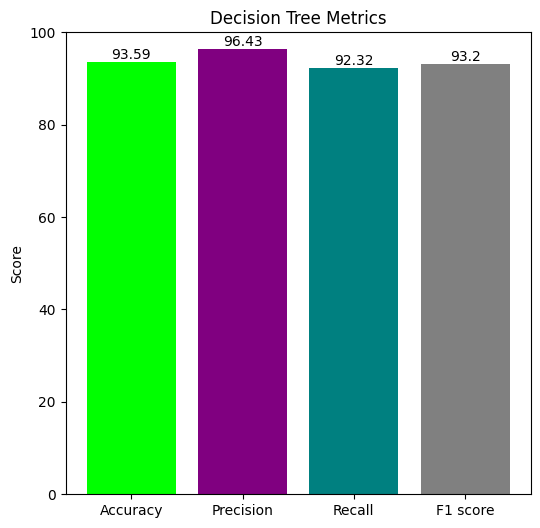

In [612]:
model_name = 'Decision Tree'
fig, ax = plt.subplots(figsize=(6, 6))
metrics = ['Accuracy', 'Precision', 'Recall','F1 score']
values = [dt_ac,dt_pc,dt_re,dt_f1]
bars = ax.bar(metrics, values, color=['Lime', 'purple', 'teal','gray'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.title(f'{model_name} Metrics')
plt.ylabel('Score')
plt.ylim(0, 100)
plt.show()

In [613]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred, pos_label=1)

In [614]:
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

0.9432404540763674

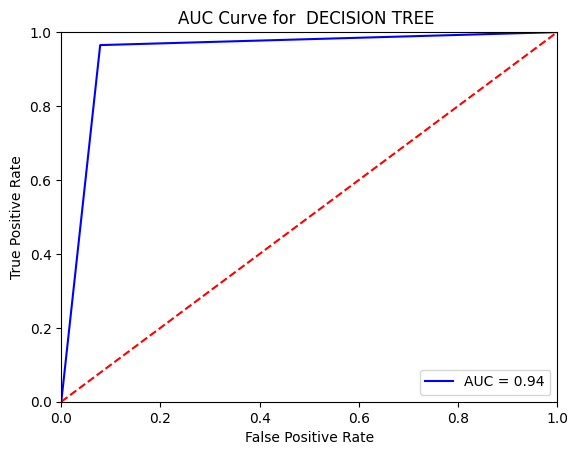

In [615]:

plt.title('AUC Curve for  DECISION TREE ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

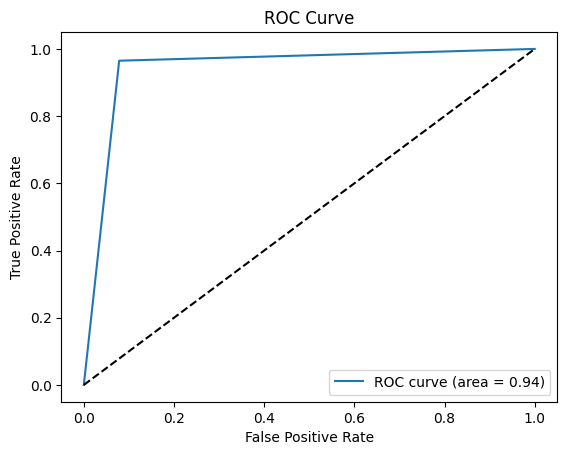

In [616]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()

RANDOM FOREST

In [617]:
clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [618]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [619]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

[[47  4]
 [ 1 56]]
95.37037037037037


In [620]:
clf5=classification_report(y_pred,y_test,output_dict=True)
e=pd.DataFrame(clf5).transpose()
e

,precision,recall,f1-score,support
0,0.921569,0.979167,0.949495,48.000000
1,0.982456,0.933333,0.957265,60.000000
accuracy,0.953704,0.953704,0.953704,0.953704
macro avg,0.952012,0.956250,0.953380,108.000000
weighted avg,0.955395,0.953704,0.953812,108.000000


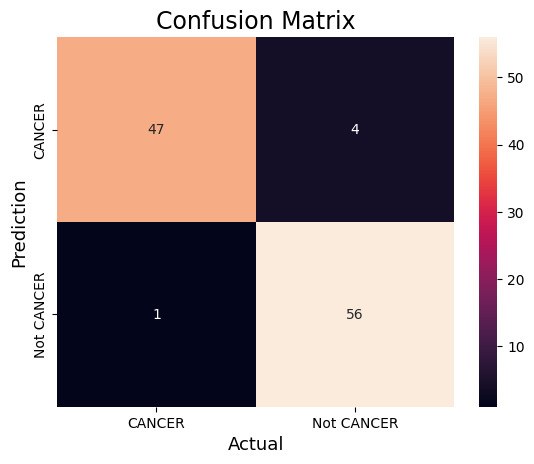

In [621]:
sns.heatmap(cm,
            annot=True,
            xticklabels=['CANCER','Not CANCER'],
            yticklabels=['CANCER','Not CANCER'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [622]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy*100)
precision = precision_score(y_test, y_pred)
print("Precision :", precision*100)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall*100)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score*100)

Accuracy   : 95.37037037037037
Precision : 93.33333333333333
Recall    : 98.24561403508771
F1-score  : 95.72649572649571


In [623]:
from sklearn.model_selection import cross_validate
k =20
kf = StratifiedKFold(n_splits=k)
kf3=cross_val_predict(clf,x,y,cv=kf)
a = cross_val_score(clf,x, y, scoring='accuracy',cv=kf)
rf_ac=np.mean(a)*100
print("accuracy:",np.mean(a)*100)
p= cross_val_score(clf,x, y, scoring='precision',cv=kf)
rf_pc=np.mean(p)*100
print("precision:",np.mean(p)*100)
f1 = cross_val_score(clf,x, y, scoring='f1',cv=kf)
rf_f1=np.mean(f1)*100
print("F1-score:",np.mean(f1)*100)
re= cross_val_score(clf,x, y, scoring='recall',cv=kf)
rf_re=np.mean(re)*100
print("Recall:",np.mean(re)*100)

accuracy: 95.92592592592591
precision: 96.86435758513932
F1-score: 96.08472693998641
Recall: 95.90659340659342


In [624]:
clf3=classification_report(y,kf3,output_dict=True)
b=pd.DataFrame(clf3).transpose()
b

,precision,recall,f1-score,support
0,0.959259,0.959259,0.959259,270.000000
1,0.959259,0.959259,0.959259,270.000000
accuracy,0.959259,0.959259,0.959259,0.959259
macro avg,0.959259,0.959259,0.959259,540.000000
weighted avg,0.959259,0.959259,0.959259,540.000000


In [625]:
specificity_scorer = make_scorer(lambda y, y_pred: confusion_matrix(y, y_pred)[0, 0] / (confusion_matrix(y, y_pred)[0, 0] + confusion_matrix(y, y_pred)[0, 1]))
spec = cross_val_score(clf, x, y, scoring=specificity_scorer, cv=kf)
rf_spe=np.mean(spec)*100
print("Specificity:",np.mean(spec)*100)
sensitivity_scorer = make_scorer(lambda y, y_pred: confusion_matrix(y, y_pred)[1, 1] / (confusion_matrix(y, y_pred)[1, 1] + confusion_matrix(y, y_pred)[1, 0]))
sens=cross_val_score(clf,x,y,scoring=sensitivity_scorer,cv=kf)
rf_sen=np.mean(sens)*100
print("sensitivity:",np.mean(sens)*100)

Specificity: 95.76923076923076
sensitivity: 95.90659340659342


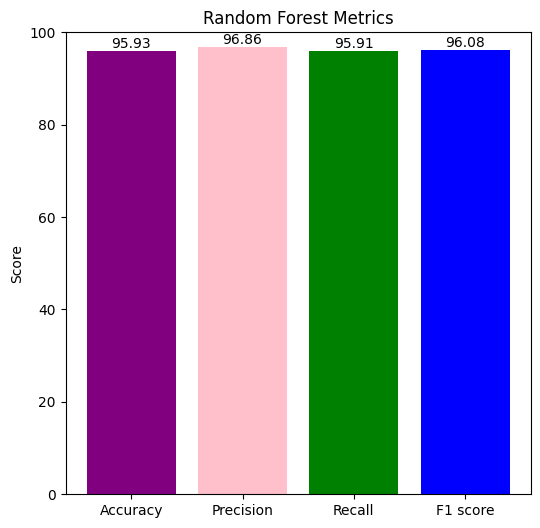

In [626]:
model_name = 'Random Forest'
fig, ax = plt.subplots(figsize=(6, 6))
metrics = ['Accuracy', 'Precision', 'Recall','F1 score']
values = [rf_ac,rf_pc,rf_re,rf_f1]
bars = ax.bar(metrics, values, color=[ 'purple','pink','green','blue'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.title(f'{model_name} Metrics')
plt.ylabel('Score')
plt.ylim(0, 100)
plt.show()

In [627]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred, pos_label=1)

In [628]:
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

0.9520123839009289

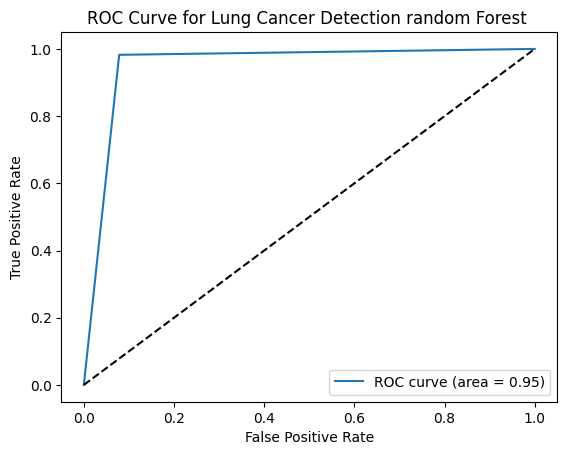

In [629]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.title('ROC Curve for Lung Cancer Detection random Forest ')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()

K-Nearest Negihbours(KNN)

In [630]:
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [631]:
y_pred= knn_model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [632]:
mats = confusion_matrix(y_test,y_pred)
print(mats)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

[[49  2]
 [ 6 51]]
92.5925925925926


In [633]:
clf7=classification_report(y_pred,y_test,output_dict=True)
g=pd.DataFrame(clf7).transpose()
g

,precision,recall,f1-score,support
0,0.960784,0.890909,0.924528,55.000000
1,0.894737,0.962264,0.927273,53.000000
accuracy,0.925926,0.925926,0.925926,0.925926
macro avg,0.927761,0.926587,0.925901,108.000000
weighted avg,0.928372,0.925926,0.925875,108.000000


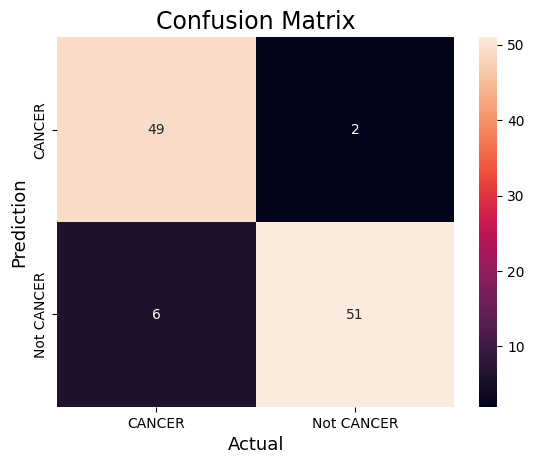

In [634]:
sns.heatmap(mats,
            annot=True,
            xticklabels=['CANCER','Not CANCER'],
            yticklabels=['CANCER','Not CANCER'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [635]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy*100)
precision = precision_score(y_test, y_pred)
print("Precision :", precision*100)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall*100)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score*100)

Accuracy   : 92.5925925925926
Precision : 96.22641509433963
Recall    : 89.47368421052632
F1-score  : 92.72727272727272


In [636]:
from sklearn.model_selection import cross_validate
k =70
kf = StratifiedKFold(n_splits=k)
kf4=cross_val_predict(knn_model,x,y,cv=kf)
a = cross_val_score(knn_model,x, y, scoring='accuracy',cv=kf)
kn_ac=np.mean(a)*100
print("accuracy:",np.mean(a)*100)
p= cross_val_score(knn_model,x, y, scoring='precision',cv=kf)
kn_pc=np.mean(p)*100
print("precision:",np.mean(p)*100)
f1 = cross_val_score(knn_model,x, y, scoring='f1',cv=kf)
kn_f1=np.mean(f1)*100
print("F1-score:",np.mean(f1)*100)
re= cross_val_score(knn_model,x, y, scoring='recall',cv=kf)
kn_re=np.mean(re)*100
print("Recall:",np.mean(re)*100)

accuracy: 92.95918367346938
precision: 97.11904761904762
F1-score: 92.13265306122447
Recall: 88.92857142857142


In [637]:
clf8=classification_report(y,kf4,output_dict=True)
h=pd.DataFrame(clf8).transpose()
h


,precision,recall,f1-score,support
0,0.897260,0.970370,0.932384,270.00000
1,0.967742,0.888889,0.926641,270.00000
accuracy,0.929630,0.929630,0.929630,0.92963
macro avg,0.932501,0.929630,0.929513,540.00000
weighted avg,0.932501,0.929630,0.929513,540.00000


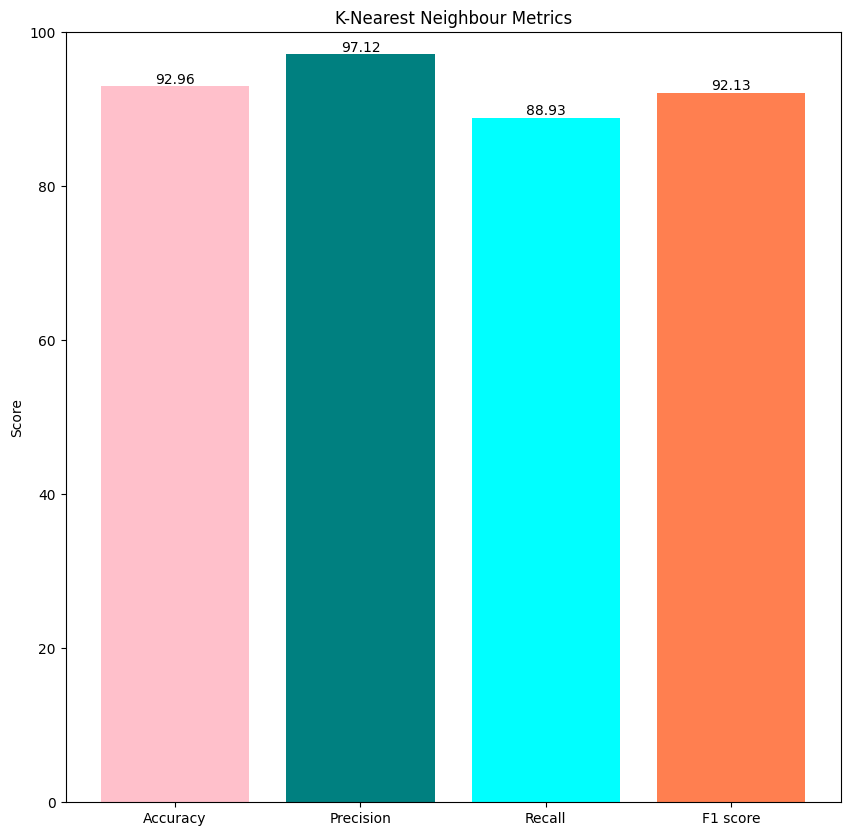

In [638]:
model_name = 'K-Nearest Neighbour'
fig, ax = plt.subplots(figsize=(10, 10))
metrics = ['Accuracy', 'Precision', 'Recall','F1 score']
values = [kn_ac,kn_pc,kn_re,kn_f1]
bars = ax.bar(metrics, values, color=['pink', 'Teal', 'Cyan', 'Coral'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.title(f'{model_name} Metrics')
plt.ylabel('Score')
plt.ylim(0, 100)
plt.show()

In [639]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred, pos_label=1)

In [640]:
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

0.9277605779153768

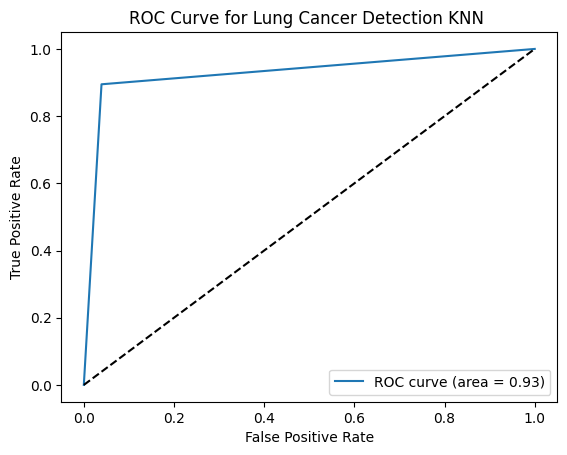

In [641]:
plt.title('ROC Curve for Lung Cancer Detection KNN ')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Support Vector Machine(SVM)

In [642]:
from sklearn.svm import SVC
SVM=SVC(kernel='linear', C=1.0)
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [643]:
y_pred_svm= SVM.predict(X_test)
y_pred_svm

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [644]:
ma = confusion_matrix(y_test,y_pred_svm)
print(ma)
accuracy = accuracy_score(y_test, y_pred_svm)
print(accuracy*100)

[[47  4]
 [ 0 57]]
96.29629629629629


In [645]:
clf9=classification_report(y_pred_svm,y_test,output_dict=True)
i=pd.DataFrame(clf9).transpose()
i

,precision,recall,f1-score,support
0,0.921569,1.000000,0.959184,47.000000
1,1.000000,0.934426,0.966102,61.000000
accuracy,0.962963,0.962963,0.962963,0.962963
macro avg,0.960784,0.967213,0.962643,108.000000
weighted avg,0.965868,0.962963,0.963091,108.000000


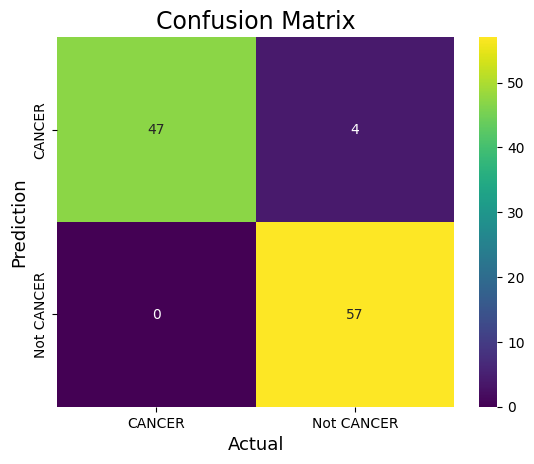

In [646]:
sns.heatmap(ma,
            annot=True,
            xticklabels=['CANCER','Not CANCER'],
            yticklabels=['CANCER','Not CANCER'],
            cmap='viridis')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [647]:
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy   :", accuracy*100)
precision = precision_score(y_test, y_pred_svm)
print("Precision :", precision*100)
recall = recall_score(y_test, y_pred_svm)
print("Recall    :", recall*100)
F1_score = f1_score(y_test, y_pred_svm)
print("F1-score  :", F1_score*100)

Accuracy   : 96.29629629629629
Precision : 93.44262295081968
Recall    : 100.0
F1-score  : 96.61016949152543


In [648]:
k =76
kf =StratifiedKFold(n_splits=k)
kf5=cross_val_predict(SVM,x,y,cv=kf)
mod = cross_val_score(SVM,x, y,scoring='accuracy' ,cv=kf)
sv_ac=np.mean(mod)*100
print("accuracy:",np.mean(mod)*100)
p= cross_val_score(SVM,x, y, scoring='precision',cv=kf)
sv_pc=np.mean(p)*100
print("precision:",np.mean(p)*100)
f1 = cross_val_score(SVM,x, y, scoring='f1',cv=kf)
sv_f1=np.mean(f1)*100
print("f1_score:",np.mean(f1)*100)
re= cross_val_score(SVM,x, y, scoring='recall',cv=kf)
sv_re=np.mean(re)*100
print("Recall:",np.mean(re)*100)

accuracy: 96.07612781954886
precision: 97.56578947368422
f1_score: 95.93671679197996
Recall: 95.83333333333334


In [649]:
clf10=classification_report(y,kf5,output_dict=True)
j=pd.DataFrame(clf10).transpose()
j

,precision,recall,f1-score,support
0,0.955882,0.962963,0.959410,270.000000
1,0.962687,0.955556,0.959108,270.000000
accuracy,0.959259,0.959259,0.959259,0.959259
macro avg,0.959284,0.959259,0.959259,540.000000
weighted avg,0.959284,0.959259,0.959259,540.000000


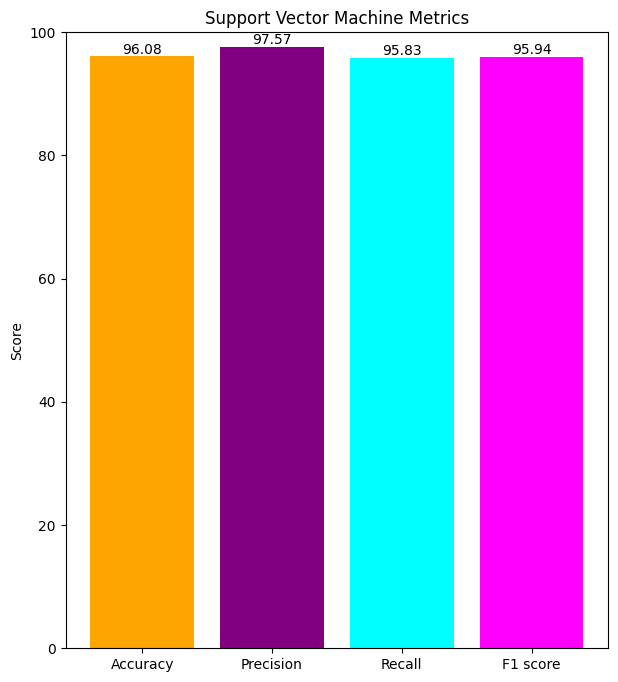

In [650]:
model_name = 'Support Vector Machine'
fig, ax = plt.subplots(figsize=(7,8))
metrics = ['Accuracy', 'Precision', 'Recall','F1 score']
values = [sv_ac,sv_pc,sv_re,sv_f1]
bars = ax.bar(metrics, values, color=['Orange','Purple','Cyan','Magenta'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.title(f'{model_name} Metrics')
plt.ylabel('Score')
plt.ylim(0, 100)
plt.show()

Naive Bayes

In [651]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [652]:
y_pred = nb.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [653]:
m= confusion_matrix(y_test,y_pred)
print(m)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

[[45  6]
 [ 2 55]]
92.5925925925926


In [654]:
clf11=classification_report(y_pred,y_test,output_dict=True)
k=pd.DataFrame(clf11).transpose()
k

,precision,recall,f1-score,support
0,0.882353,0.957447,0.918367,47.000000
1,0.964912,0.901639,0.932203,61.000000
accuracy,0.925926,0.925926,0.925926,0.925926
macro avg,0.923633,0.929543,0.925285,108.000000
weighted avg,0.928984,0.925926,0.926182,108.000000


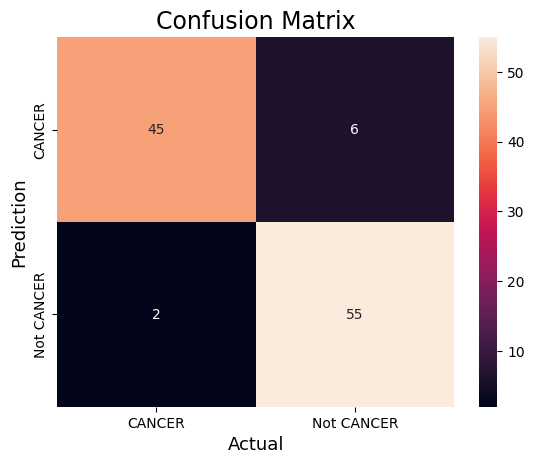

In [655]:
sns.heatmap(m,
            annot=True,
            xticklabels=['CANCER','Not CANCER'],
            yticklabels=['CANCER','Not CANCER'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [656]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy*100)
precision = precision_score(y_test, y_pred)
print("Precision :", precision*100)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall*100)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score*100)
tn, fp, fn, tp = m.ravel()
specificity = tn / (tn + fp)
print("Specificity :", specificity*100)

Accuracy   : 92.5925925925926
Precision : 90.1639344262295
Recall    : 96.49122807017544
F1-score  : 93.22033898305084
Specificity : 88.23529411764706


In [657]:
k =15
kf = StratifiedKFold(n_splits=k)
kf6=cross_val_predict(nb,x,y,cv=kf)
mod = cross_val_score(nb,x, y, cv=kf)
nb_ac=np.mean(mod)*100
print("accuracy:",np.mean(mod)*100)
p= cross_val_score(nb,x, y, scoring='precision',cv=kf)
nb_pc=np.mean(p)*100
print("precision:",np.mean(p)*100)
f1 = cross_val_score(nb,x, y, scoring='f1',cv=kf)
nb_f1=np.mean(f1)*100
print("f1_score:",np.mean(f1)*100)
re= cross_val_score(nb,x, y, scoring='recall',cv=kf)
nb_re=np.mean(re)*100
print("Recall:",np.mean(re)*100)

accuracy: 91.2962962962963
precision: 89.19995361229482
f1_score: 91.86917420505158
Recall: 95.92592592592592


In [658]:
clf12=classification_report(y,kf6,output_dict=True)
l=pd.DataFrame(clf12).transpose()
l

,precision,recall,f1-score,support
0,0.955102,0.866667,0.908738,270.000000
1,0.877966,0.959259,0.916814,270.000000
accuracy,0.912963,0.912963,0.912963,0.912963
macro avg,0.916534,0.912963,0.912776,540.000000
weighted avg,0.916534,0.912963,0.912776,540.000000


In [659]:
specificity_scorer = make_scorer(lambda y, y_pred: confusion_matrix(y, y_pred)[0, 0] / (confusion_matrix(y, y_pred)[0, 0] + confusion_matrix(y, y_pred)[0, 1]))
spec = cross_val_score(nb, x, y, scoring=specificity_scorer, cv=kf)
kn_spe=np.mean(spec)*100
print("Specificity:",np.mean(spec)*100)
sensitivity_scorer = make_scorer(lambda y, y_pred: confusion_matrix(y, y_pred)[1, 1] / (confusion_matrix(y, y_pred)[1, 1] + confusion_matrix(y, y_pred)[1, 0]))
sens=cross_val_score(nb,x,y,scoring=sensitivity_scorer,cv=kf)
kn_sen=np.mean(sens)*100
print("sensitivity:",np.mean(sens)*100)

Specificity: 86.66666666666669
sensitivity: 95.92592592592592


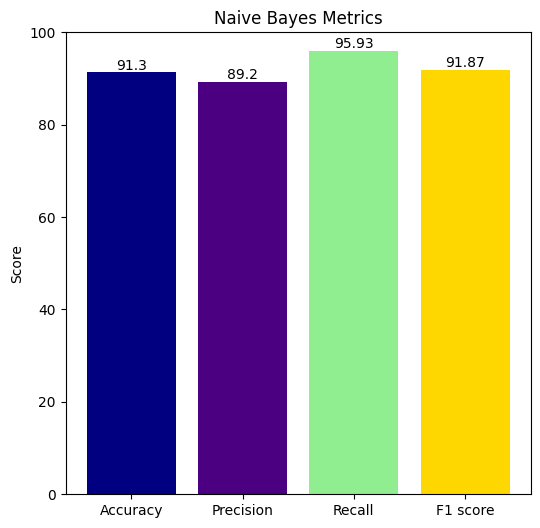

In [660]:
model_name = 'Naive Bayes'
fig, ax = plt.subplots(figsize=(6, 6))
metrics = ['Accuracy', 'Precision', 'Recall','F1 score']
values = [nb_ac,nb_pc,nb_re,nb_f1]
bars = ax.bar(metrics, values, color=['Navy', 'indigo', 'lightgreen', 'gold'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.title(f'{model_name} Metrics')
plt.ylabel('Score')
plt.ylim(0, 100)
plt.show()

  Model   Accuracy  Precision     Recall   F1_Score
0    LR  96.147186  97.331092  96.000000  96.297945
1    DT  93.585165  96.427579  92.321429  93.202502
2    RF  95.925926  96.864358  95.906593  96.084727
3   KNN  92.959184  97.119048  88.928571  92.132653
4   SVM  96.076128  97.565789  95.833333  95.936717
5    NB  91.296296  89.199954  95.925926  91.869174


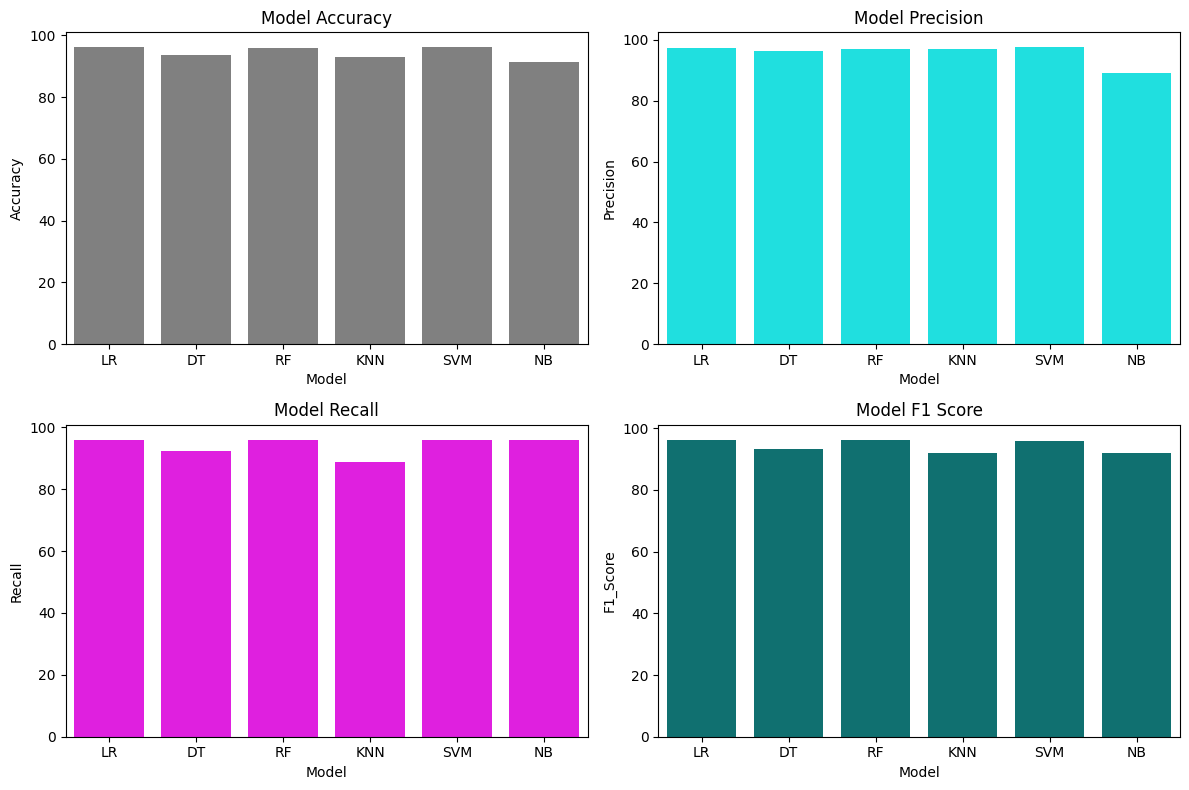

In [661]:
data = {
    #'Model': ['LOGISTIC REGRESSIN', 'DECISION TREE', 'RANDOM FOREST','K-NEAREST NEIGHBOUR','SUPPORT VECTOR MACHINE','NAIVE BAYES'],
    'Model':['LR','DT','RF','KNN','SVM','NB'],
    'Accuracy': [lr_ac,dt_ac,rf_ac,kn_ac,sv_ac,nb_ac],
    'Precision': [lr_pc,dt_pc,rf_pc,kn_pc,sv_pc,nb_pc],
    'Recall': [lr_re,dt_re,rf_re,kn_re,sv_re,nb_re],
    'F1_Score': [lr_f1,dt_f1,rf_f1,kn_f1,sv_f1,nb_f1]
}
dtfm= pd.DataFrame(data)
print(dtfm)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.barplot(x=dtfm['Model'], y=dtfm['Accuracy'], color='gray')
plt.title('Model Accuracy')
plt.subplot(2, 2, 2)
sns.barplot(x=dtfm['Model'], y=dtfm['Precision'], color='cyan')
plt.title('Model Precision')
plt.subplot(2, 2, 3)
sns.barplot(x=dtfm['Model'], y=dtfm['Recall'], color='Magenta')
plt.title('Model Recall')
plt.subplot(2, 2, 4)
sns.barplot(x=dtfm['Model'], y=dtfm['F1_Score'], color='Teal')
plt.title('Model F1 Score')
plt.tight_layout()
plt.show()


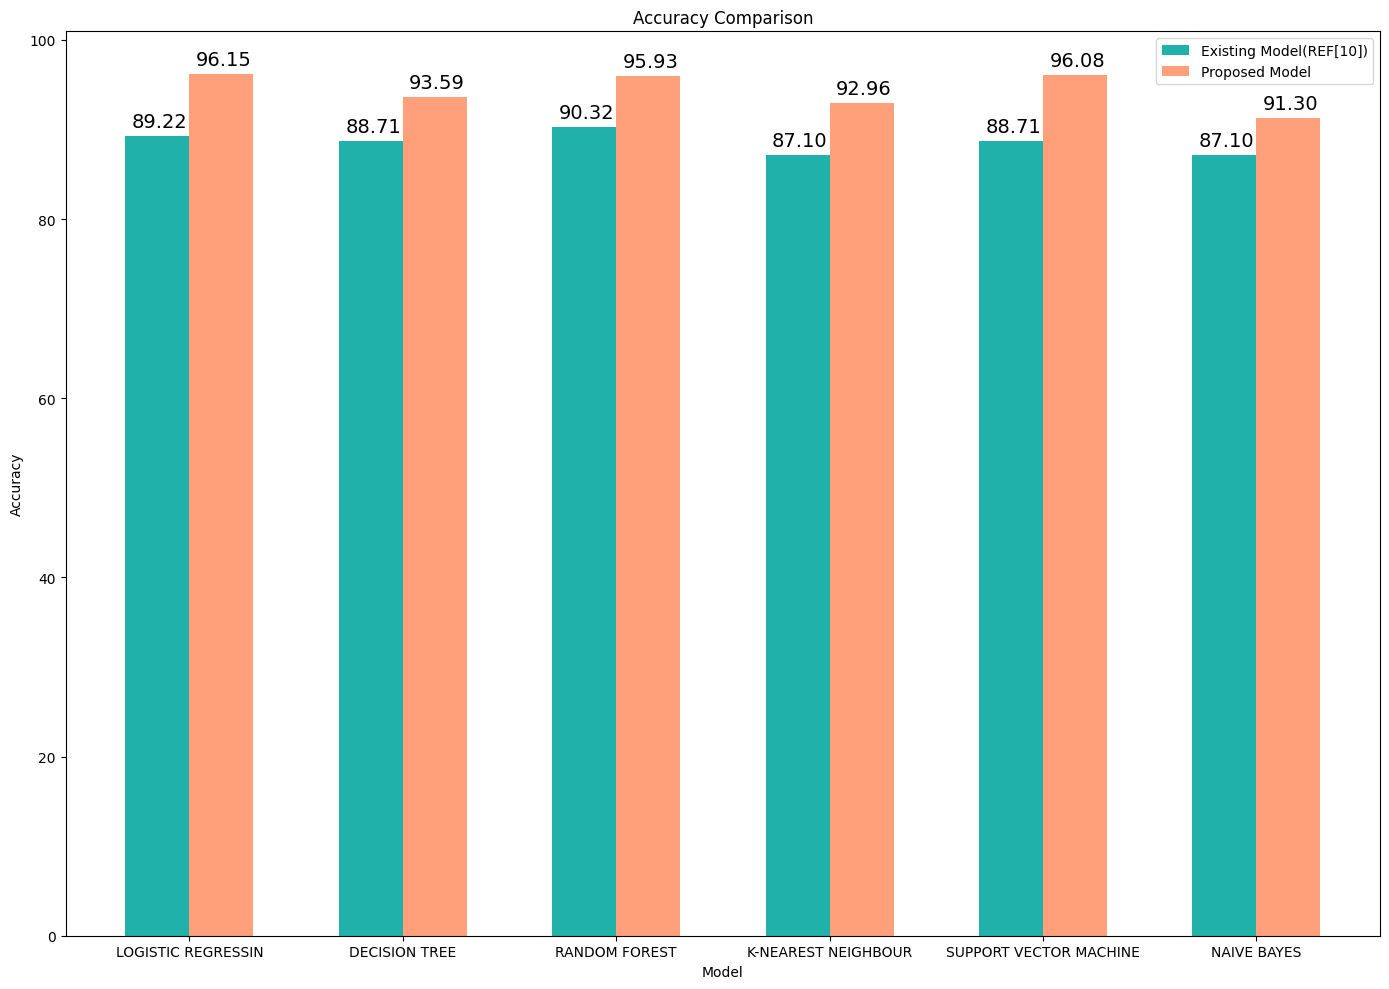

In [662]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_before = {

    'Model': ['LOGISTIC REGRESSIN', 'DECISION TREE', 'RANDOM FOREST','K-NEAREST NEIGHBOUR','SUPPORT VECTOR MACHINE','NAIVE BAYES'],
    'Accuracy': [89.22, 88.71, 90.32, 87.1,88.71,87.1],
}

data_after = {
    'Model': ['LOGISTIC REGRESSIN', 'DECISION TREE', 'RANDOM FOREST','K-NEAREST NEIGHBOUR','SUPPORT VECTOR MACHINE','NAIVE BAYES'],
    'Accuracy': [lr_ac,dt_ac,rf_ac,kn_ac,sv_ac,nb_ac],
}

# Create dataframes
dtfm_before = pd.DataFrame(data_before)
dtfm_after = pd.DataFrame(data_after)

# Set the Model column as the index for better plotting
dtfm_before.set_index('Model', inplace=True)
dtfm_after.set_index('Model', inplace=True)

# Create a bar graph
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))
def plot_bargraph(ax, metric, title):
    before_values = dtfm_before[metric]
    after_values = dtfm_after[metric]
    models = dtfm_before.index

    index = np.arange(len(models))
    bar_width = 0.3

    ax.bar(index, before_values, width=bar_width, label='Existing Model(REF[10])', color='lightseagreen')
    ax.bar(index + bar_width, after_values, width=bar_width, label='Proposed Model', color='lightsalmon')

    for i in range(len(models)):
        ax.text(index[i] - 0.12, before_values[i] + 1, f'{before_values[i]:.2f}', fontsize=14)
        ax.text(index[i] + bar_width - 0.12, after_values[i] + 1, f'{after_values[i]:.2f}', fontsize=14)

    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models)
    ax.legend()

plot_bargraph(axes, 'Accuracy', 'Accuracy Comparison')
plt.tight_layout()
plt.show()

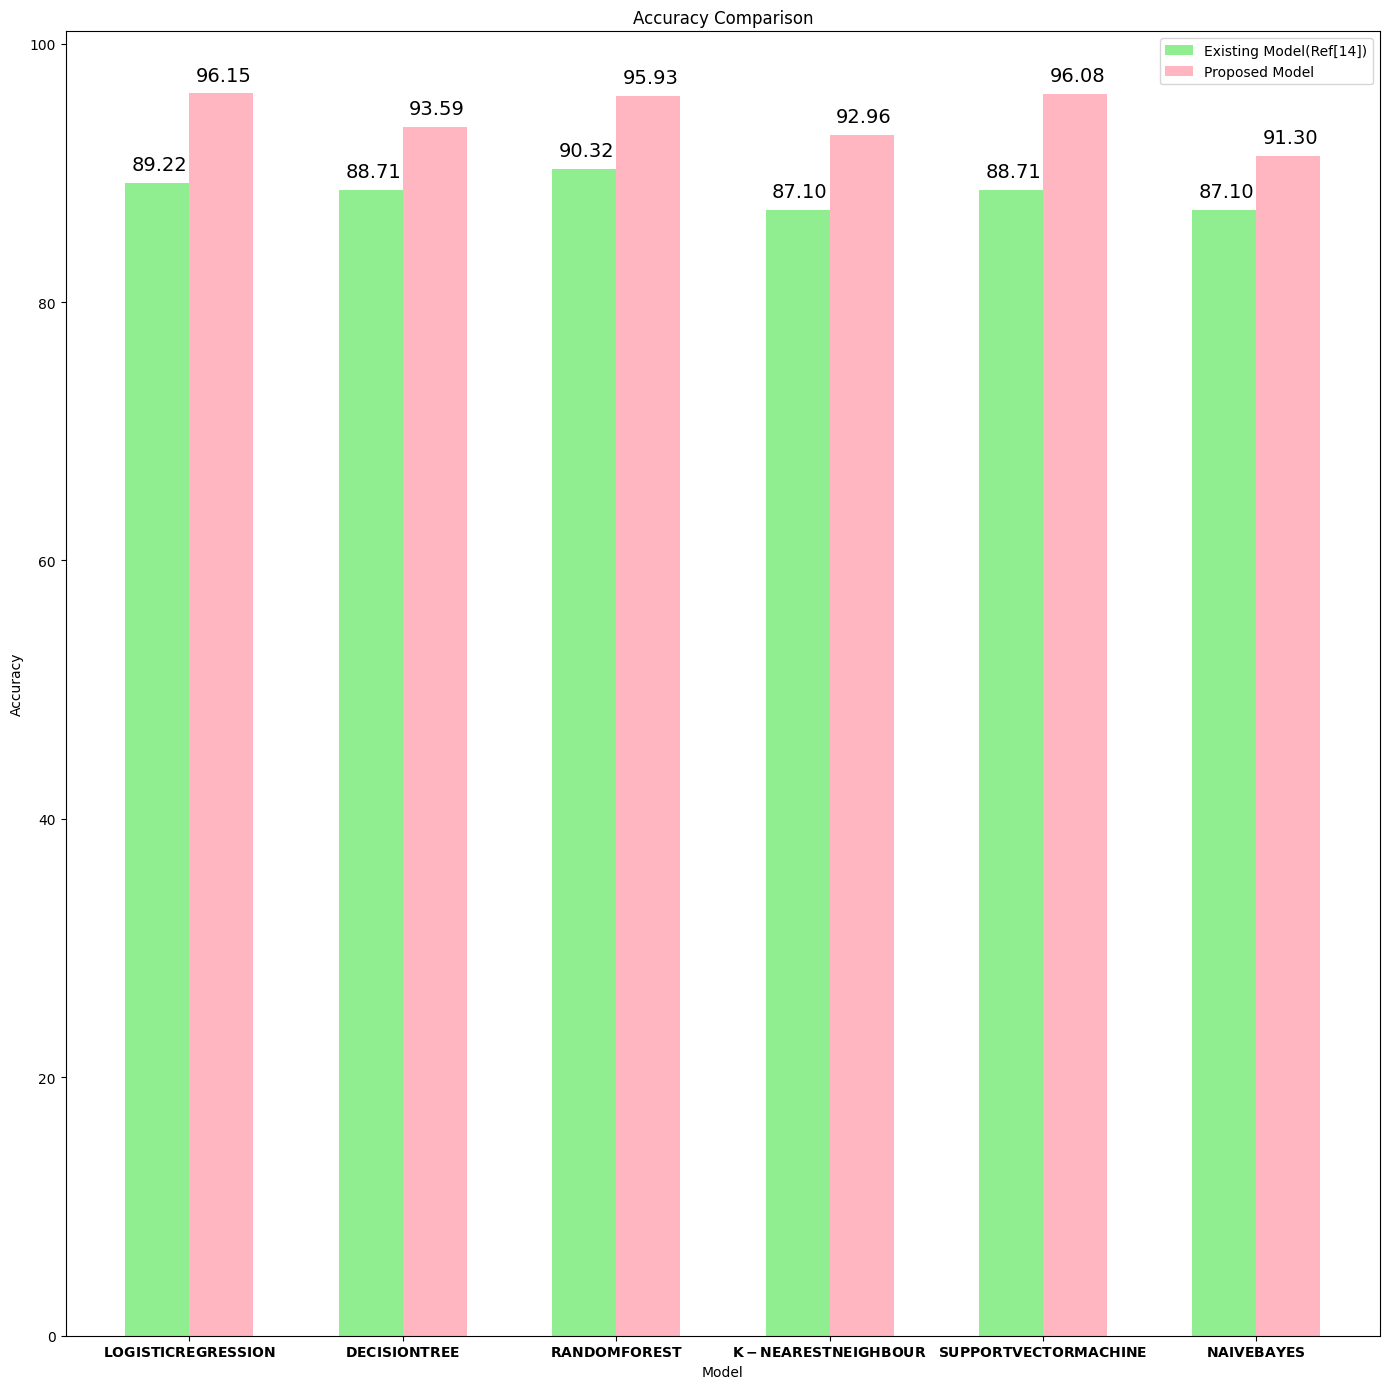

In [663]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_before = {
    'Model': ['LOGISTIC REGRESSION', 'DECISION TREE', 'RANDOM FOREST', 'K-NEAREST NEIGHBOUR', 'SUPPORT VECTOR MACHINE', 'NAIVE BAYES'],
    'Accuracy': [89.22, 88.71, 90.32, 87.1, 88.71, 87.1],
}

data_after = {
    'Model': ['LOGISTIC REGRESSION', 'DECISION TREE', 'RANDOM FOREST', 'K-NEAREST NEIGHBOUR', 'SUPPORT VECTOR MACHINE', 'NAIVE BAYES'],
    'Accuracy': [lr_ac, dt_ac, rf_ac, kn_ac, sv_ac, nb_ac],
}

# Create dataframes
dtfm_before = pd.DataFrame(data_before)
dtfm_after = pd.DataFrame(data_after)

# Set the Model column as the index for better plotting
dtfm_before.set_index('Model', inplace=True)
dtfm_after.set_index('Model', inplace=True)

# Create a bar graph
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 14))

def plot_bargraph(ax, metric, title):
    before_values = dtfm_before[metric]
    after_values = dtfm_after[metric]
    models = dtfm_before.index

    index = np.arange(len(models))
    bar_width = 0.3

    ax.bar(index, before_values, width=bar_width, label='Existing Model(Ref[14])', color='lightgreen')
    ax.bar(index + bar_width, after_values, width=bar_width, label='Proposed Model', color='lightpink')

    for i in range(len(models)):
        ax.text(index[i] - 0.12, before_values[i] + 1, f'{before_values[i]:.2f}', fontsize=14)
        ax.text(index[i] + bar_width - 0.12, after_values[i] + 1, f'{after_values[i]:.2f}', fontsize=14)

    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels([f"$\mathbf{{{model}}}$" for model in models])  # Bold model names using LaTeX
    ax.legend()

plot_bargraph(axes, 'Accuracy', 'Accuracy Comparison')
plt.tight_layout()
plt.show()


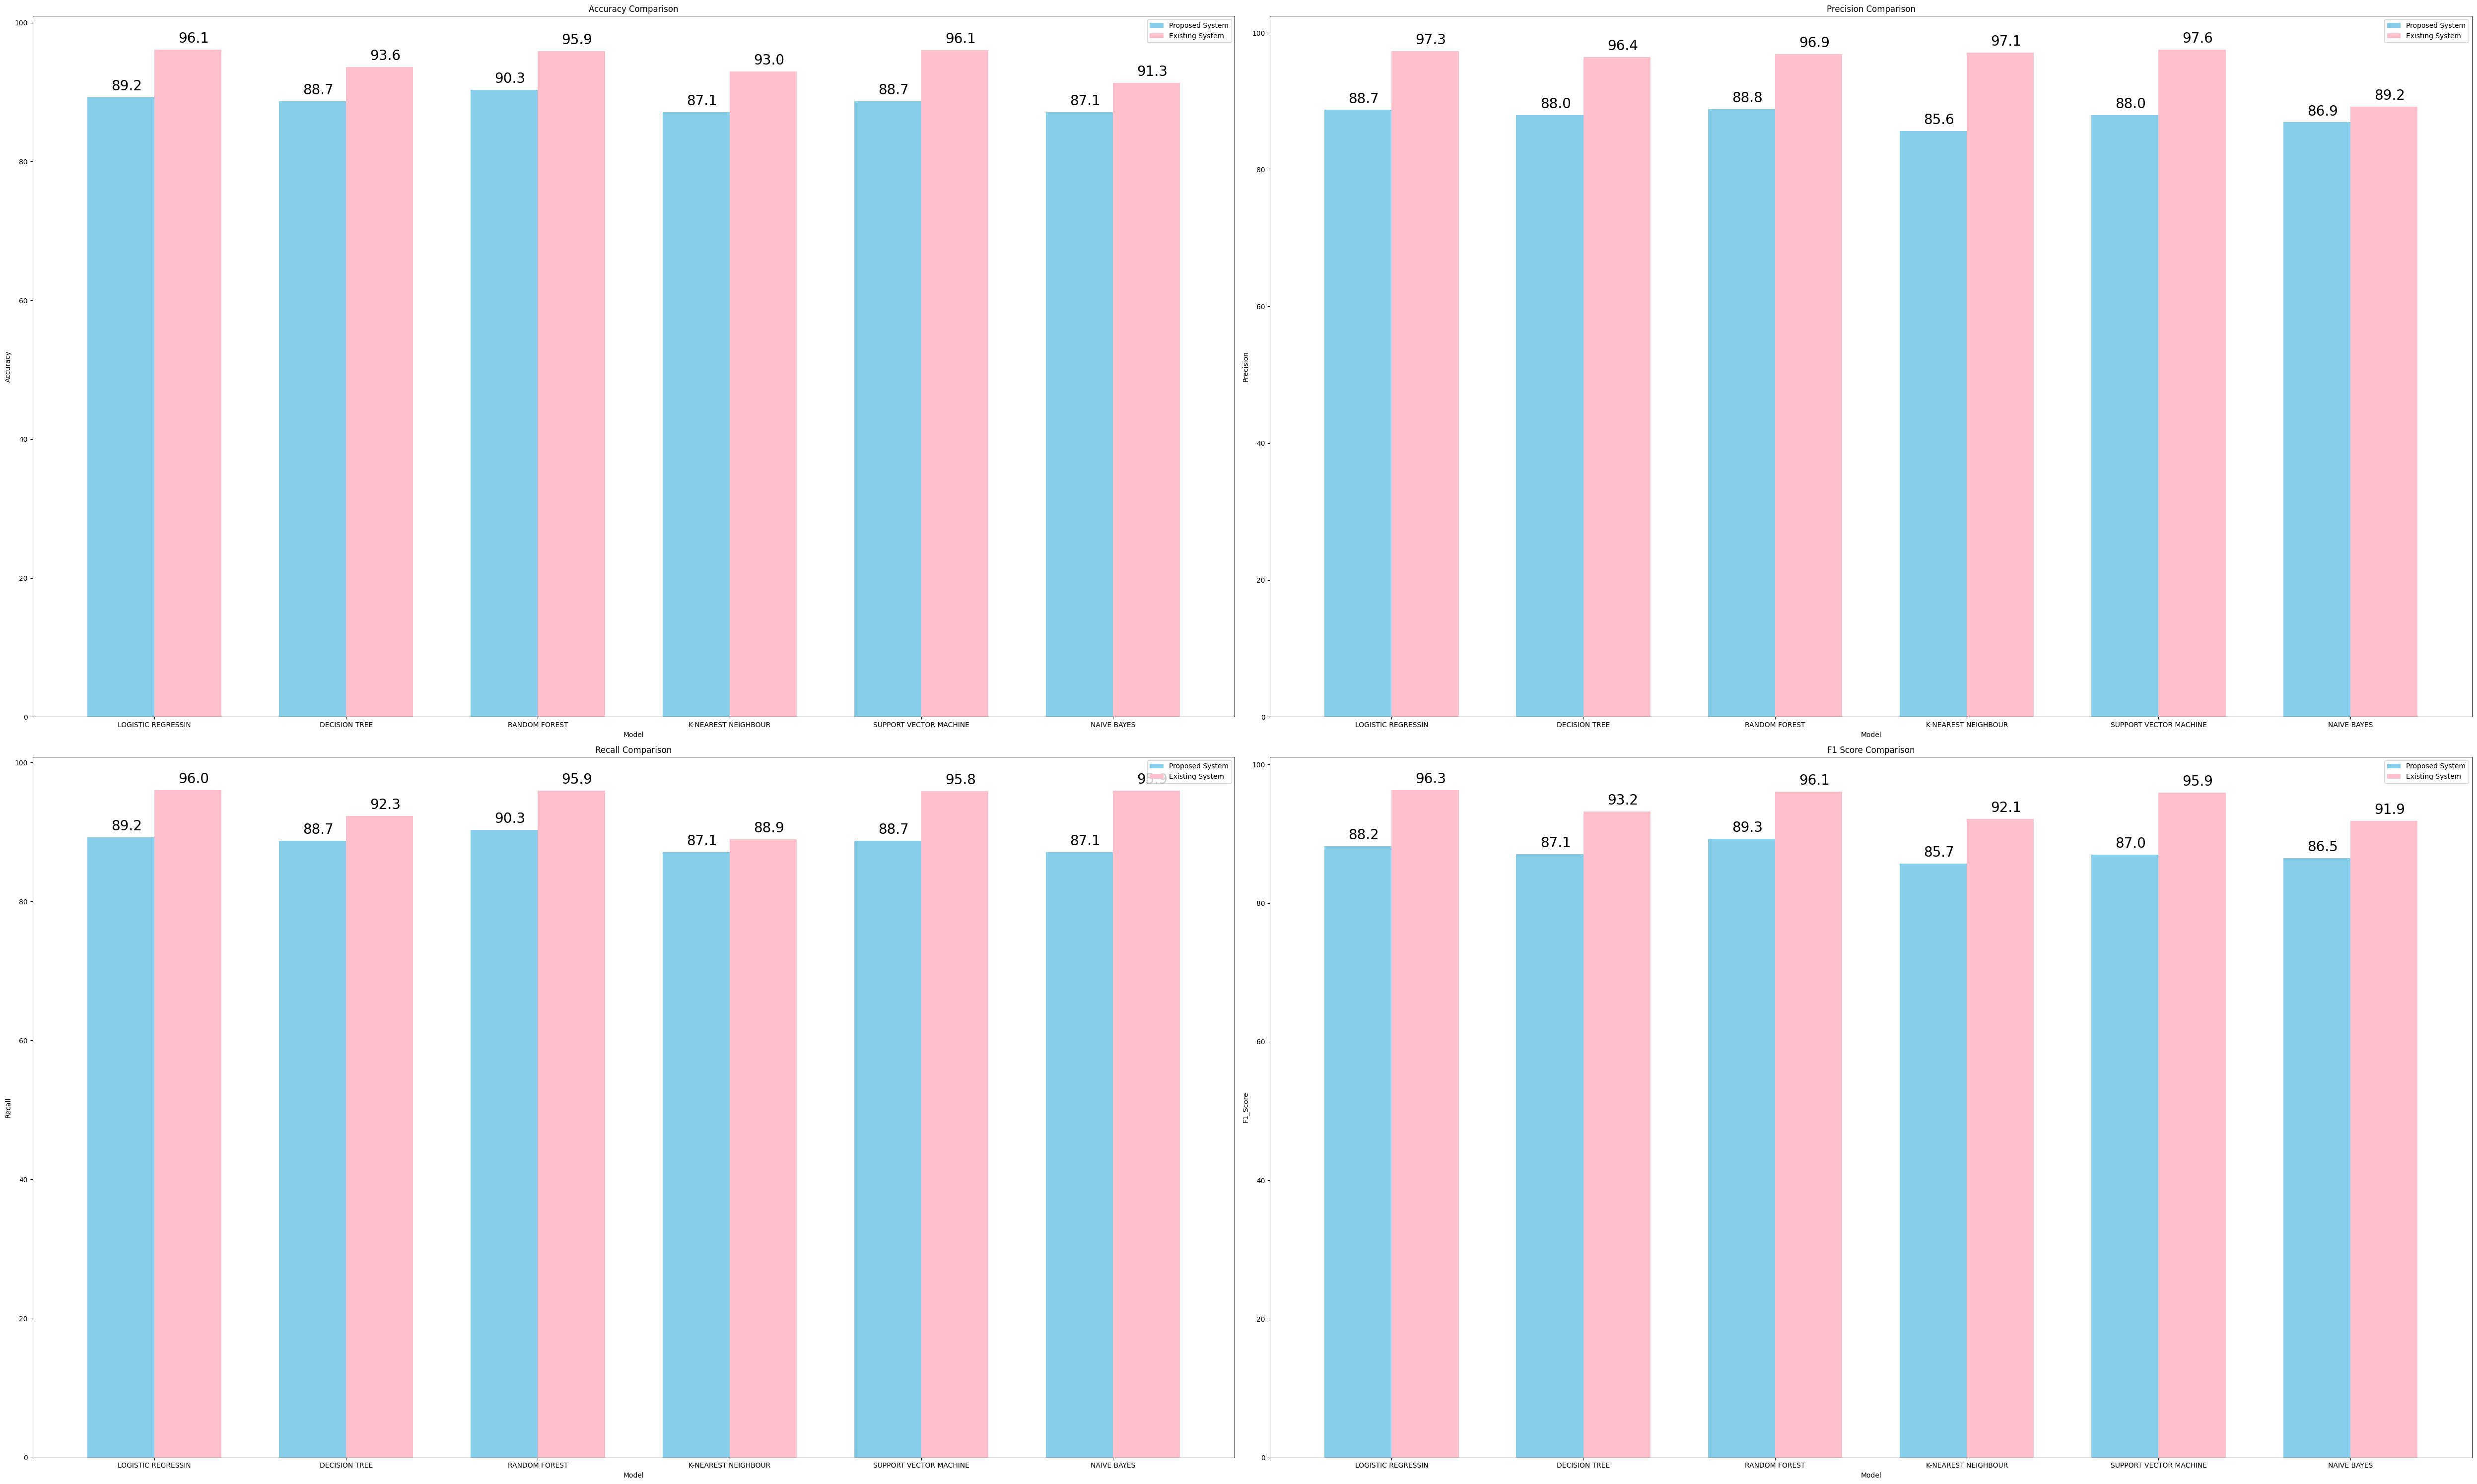

In [664]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_before = {

    'Model': ['LOGISTIC REGRESSIN', 'DECISION TREE', 'RANDOM FOREST','K-NEAREST NEIGHBOUR','SUPPORT VECTOR MACHINE','NAIVE BAYES'],
    'Accuracy': [89.22, 88.71, 90.32, 87.1,88.71,87.1],
    'Precision': [88.72, 87.95, 88.82,85.64,87.95,86.91],
    'Recall': [89.22,88.71,90.32,87.1,88.71,87.1],
    'F1_Score': [88.19,87.09,89.29,85.72,87.02,86.5]
}

data_after = {
    'Model': ['LOGISTIC REGRESSIN', 'DECISION TREE', 'RANDOM FOREST','K-NEAREST NEIGHBOUR','SUPPORT VECTOR MACHINE','NAIVE BAYES'],
    'Accuracy': [lr_ac,dt_ac,rf_ac,kn_ac,sv_ac,nb_ac],
    'Precision': [lr_pc,dt_pc,rf_pc,kn_pc,sv_pc,nb_pc],
    'Recall': [lr_re,dt_re,rf_re,kn_re,sv_re,nb_re],
    'F1_Score': [lr_f1,dt_f1,rf_f1,kn_f1,sv_f1,nb_f1]
}

dtfm_before = pd.DataFrame(data_before)
dtfm_after = pd.DataFrame(data_after)

dtfm_before.set_index('Model', inplace=True)
dtfm_after.set_index('Model', inplace=True)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(50, 30))

def plot_bargraph(ax, metric, title):
    before_values = dtfm_before[metric]
    after_values = dtfm_after[metric]
    models = dtfm_before.index

    index = np.arange(len(models))
    bar_width = 0.35

    ax.bar(index, before_values, width=bar_width, label='Proposed System', color='skyblue')
    ax.bar(index + bar_width, after_values, width=bar_width, label='Existing System', color='pink')

    for i in range(len(models)):
        ax.text(index[i] - 0.05, before_values[i] + 1, f'{before_values[i]:.1f}', fontsize=20)
        ax.text(index[i] + bar_width - 0.05, after_values[i] + 1, f'{after_values[i]:.1f}', fontsize=20)

    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models)
    ax.legend()

plot_bargraph(axes[0, 0], 'Accuracy', 'Accuracy Comparison')
plot_bargraph(axes[0, 1], 'Precision', 'Precision Comparison')
plot_bargraph(axes[1, 0], 'Recall', 'Recall Comparison')
plot_bargraph(axes[1, 1], 'F1_Score', 'F1 Score Comparison')

plt.tight_layout()
plt.show()


In [665]:
! pip install joblib
import pickle
import joblib
joblib.dump(SVM,"MY_MODEL.pkl")
model=joblib.load("MY_MODEL.pkl")
with open('MY_MODEL.pkl', 'wb') as file:
    pickle.dump(model, file)
print(model.predict([[0,69,0,1,0,1,0,1,1,1,1,1,1,1]])[0])
print(model.predict([[0,63,1,1,0,0,0,0,0,1,0,0,1,0]])[0])

1
0



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
